<h1><center>Python Intermediário para Análise de Dados</center></h1>

### Módulo 1: Extensões sobre funções ----------------------

### Lição 1: Parâmetros múltiplos e dinâmicos


#### Parte 1: Parâmentros *args

Assim como vimos, o *args é uma sintaxe que permite passarmos uma sequência de parâmetros de comprimento variável.

In [2]:
def estudante(nome, idade, *args):
  print("nome:", nome)
  print("idade", idade)
  print(args, type(args))

In [3]:
estudante("João", "50")

nome: João
idade 50
() <class 'tuple'>


In [4]:
estudante("João", "50", 20, 30)

nome: João
idade 50
(20, 30) <class 'tuple'>


In [5]:
estudante("João", "50", [20, 30], 10, "ola")

nome: João
idade 50
([20, 30], 10, 'ola') <class 'tuple'>


In [6]:
def estudante(nome, idade, *args):
  print("nome:", nome)
  print("idade", idade)
  for a in args:
    print('Nota:',a)
  print('Média:',sum(args)/len(args))

#### Parte 2: Parâmetro **kwargs

A outra sintaxe vista foi o __**kwargs__, usada para passar uma sequencia de parâmetros do tipo 'chave: valor' de comprimento variável.

In [7]:
def estudante(nome, idade, **kwargs):
  print("nome:", nome)
  print("idade", idade)
  print(kwargs, type(kwargs))

In [8]:
estudante("Joao", 22, matematica=10, historia=7, portugues=9, ingles=8, fisica = 10)

nome: Joao
idade 22
{'matematica': 10, 'historia': 7, 'portugues': 9, 'ingles': 8, 'fisica': 10} <class 'dict'>


In [9]:
def estudante(nome, idade, **kwargs):
  print("nome:", nome)
  print("idade", idade)
  for chave, valor in kwargs.items():
    print(chave, ":", valor)

### Lição 2: Funções como objetos de primeira classe

Quando dizemos que funções são objetos de primeira classe queremos dizer que elas se comportam assim qualquer outro tipo nativo da linguagem. Isso significa que podemos passar funções como parâmetros de outras funções, podemos armazenar funções em variáveis, e muito mais!

In [11]:
def funcao_def():
  print("minha funcao def")

lamb = lambda x: x*2

lista_heterogenea = [funcao_def, lamb, lambda x: 3*x]

In [12]:
lista_heterogenea

[<function __main__.funcao_def()>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

O mais interessante das funções serem tratadas como qualquer outro tipo de objeto é a possibilidade de passarmos funções como parâmetros para outras funções 

### Lição 3: Funções de ordem superior

Existem diversas funções prontas que recebem uma outra função como parâmetro, dentre elas temos **map()**, **filter()** e **reduce()**

#### Parte 1: Função map()

Vimos qual a ideia por trás do map, mas como ele funciona na prática?

In [14]:
map?

Usando uma função comum, nós temos:

In [15]:
l = range(1, 6)
print(l)
list(l)

range(1, 6)


[1, 2, 3, 4, 5]

In [16]:
def quadrados(lista):
  res_lista = []
  for l in lista:
    res_lista.append(l**2)
  return res_lista

In [17]:
quadrados(l)

[1, 4, 9, 16, 25]

Usando o map:

In [19]:
m = map(lambda x: x**2, l)

print(m)  
print(type(m))
list (m)  

<class 'map'>


[1, 4, 9, 16, 25]

Observe que o Python reconhece a variável **m** de fato como um objeto map. Além disso, temos a possibilidade de converter o resultado desse objeto m em uma lista

Como o objeto que o map retorna é iterável, podemos percorre-lo com um loop

In [20]:
for i in map(lambda x: x**2, l):
  print(i)

1
4
9
16
25


Outra maneira interessante de usar o map é multiplicar uma lista por um valor especifico.

In [21]:
l = [1, 2, 4, 5]
esc = 2

print(len(l))
list(map(lambda x, y: x * y, l, [esc]*len(l)))

4


[2, 4, 8, 10]

#### Parte 2: Função filter()

Outra função importante é o **filter()**. Assim como o map, passamos como parâmetro a função que queremos aplicar no(s) iterador(es). 

In [22]:
filter?

Como já mostramos, a diferença entre o filter e o map é que no filter retornamos apenas aqueles valores que atendem a condição da função passada. É importante falar que o filter retorna os valores que atendem a condição ao invés de indicar como **True** ou **False**.

In [23]:
filter(lambda x: x % 2 == 0, l)
list(filter(lambda x: x % 2 == 0, l))

[2, 4]

Nos exemplos a seguir temos duas situações:

1. O uso normal do filter, em que ele retornará apenas os elementos da lista que são maiores que 5;

In [24]:
lista = [1, 4, 6, 8, 10, 3, 7]
list(filter(lambda x: x>5, lista))

[6, 8, 10, 7]

2. Uma aplicação diferente do filter, para ele retornar apenas os valores que são menores que 5

In [25]:
r = filter(lambda x: False if x > 5 else True, lista )
print(list(r))

[1, 4, 3]


#### Parte 3: Função reduce()

Por último temos a função **reduce()**, que, como vimos, retorna um valor agregado de acordo com a função que passamos como parâmetro.

Ao contrário das outras funções o reduce deve ser importado da biblioteca _functools_, já que ela não faz parte das Built-in Functions.

In [26]:
from functools import reduce

In [27]:
reduce?

In [28]:
iterador = range(1, 5)
reduce(lambda x,y: x+y, iterador)

10

In [29]:
reduce(lambda x,y: x*y, iterador)

24

Um exemplo prático da função **reduce()** é quando precisamos **calcular juros compostos**. Para fazermos isso precisamos do valor inical e dos juros que devem ser aplicados

In [30]:
valor_inicial = 1000
juros = [0.01, 0.02, 0.08, 0.02]

valor_final = reduce(lambda x, y: x*(1 + y), juros, valor_inicial)

valor_final - valor_final

0.0

### Lição 4: Funções para iteradores e iteráveis

#### Parte 1: Funções any() e all()


| Any | All   |
|:------:|:------:|
|A função pega um objeto iterável em Python e retorna verdadeiro se algum dos elementos atende à condição| Recebe um objeto iterável e retorna verdadeiro apenas se todos cumprem a condição|

In [31]:
lista = [1, 4, 6, 2, 3, 9]

**Any**

In [32]:
list(map(lambda x: x < 5, lista))

[True, True, False, True, True, False]

In [33]:
any(map(lambda x: x < 5, lista))

True

É interessante também vermos o any juntamente com o filter(). Ele retorna *true* quando algum valor atende à condição, mas retorna *false* se nenhuma retornar

In [34]:
print(list(filter(lambda x: x > 5, lista)))
print(any(filter(lambda x: x > 5, lista)))

[6, 9]
True


**All**

In [35]:
list(map(lambda x: x < 5, lista))

[True, True, False, True, True, False]

In [36]:
all(map(lambda x: x < 5, lista))

False

#### Parte 2: Função zip()

| Zip | 
|:------:|
|Retorna um objeto iteravel "zipado" com o que foi passado como parâmetro|

In [37]:
l1 = [1, 2, 3, 4]
l2 = [5, 3, 6, 2]

In [38]:
list(zip(l1, l2))

[(1, 5), (2, 3), (3, 6), (4, 2)]

Essa função é muito utilizada quando temos um loop **for** e queremos que ele tenha dois contadores que irão percorrer duas sequência diferentes

In [39]:
for i, j in zip(l1, l2):
  print('L1:', i, ' L2:', j)

L1: 1  L2: 5
L1: 2  L2: 3
L1: 3  L2: 6
L1: 4  L2: 2


É importante ressaltar que o **zip()** pode ser usado com qualquer objeto iterável

## Módulo 2: Avançando em Orientação a Objetos

### Lição 2: Herança

Vamos construir o exemplo mostrado. Temos uma **Classe mãe** (Superclasse) nomeada **Veículo**. Dela criaremos duas classes _Carro_ e _Moto_

In [1]:
class Veiculo ():
  def __init__(self, marca, modelo, anoDeFabricacao, cor):
      self.marca = marca 
      self.modelo = modelo
      self.anoDeFabricacao = anoDeFabricacao
      self.cor = cor 

class Carro (Veiculo):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, qnt_portas, vol_bagageiro):
      super().__init__(marca, modelo, anoDeFabricacao, cor)
      self.qnt_portas = qnt_portas
      self.vol_bagageiro = vol_bagageiro #metros cúbicos
       
class Moto (Veiculo):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, viseira=False, porta_capacete=True):
      super().__init__(marca, modelo, anoDeFabricacao, cor)
      self.porta_capacete = porta_capacete
      self.viseira = viseira

In [2]:
gol = Carro('wolks', 'gol', 2010, 'laranja', 4, 500) 
fusca = Carro('wolks', 'fusca', 1990, 'azul claro', 2, 300)

bis = Moto('honda', 'bis', 2018, 'vermelho', viseira=True)

In [3]:
isinstance(gol, Moto)

False

In [4]:
print('Gol: ', gol.marca, '\t', gol.qnt_portas)
print('Bis: ', bis.anoDeFabricacao, '\t', bis.porta_capacete)

Gol:  wolks 	 4
Bis:  2018 	 True


### Lição 3: Herança múltipla

Então, para modelar o nosso problema de **Veículos Terrestres** e **Veículos Aquáticos** podemos usar duas situações

1. Usando o conceito normal de herança
2. Usando o conceito de herança múltipla exemplificado abaixo:


In [5]:
class Veiculo ():
  def __init__(self, marca, modelo, anoDeFabricacao, cor):
      self.marca = marca 
      self.modelo = modelo
      self.anoDeFabricacao = anoDeFabricacao
      self.cor = cor 

class Veiculo_Terrestre ():
    def __init__(self):
      self.qnt_rodas = None
      # pass
    
    def set_qnt_rodas(self, qnt_rodas):
      self.qnt_rodas = qnt_rodas

class Veiculo_Aquatico ():
  pass

class Carro (Veiculo, Veiculo_Terrestre):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, qnt_rodas, qnt_portas, vol_bagageiro):
      super().__init__(marca, modelo, anoDeFabricacao, cor)
      super().set_qnt_rodas(qnt_rodas)
      self.qnt_portas = qnt_portas
      self.vol_bagageiro = vol_bagageiro #metros cúbicos

#Hierarquia de herança. 
#Perde referencia inicializador da segunda classe
#Necessario redefinicoes para a segunda classe
#So para o modelo, usuario continua de boas

Na herança múltipla o método *super()* funciona de um jeito diferente. Como ele herda de duas classes diferentes, caso haja conflito de métodos, ele sempre "escolherá" o método da primeira classe passada como parâmetro

In [6]:
gol = Carro('wolks', 'gol', 2010, 'branco', 4, 4, 500) 

#Atributos de Veiculo, Veiculo, Veiculo_Terrestre e Carro, respectivamente
print(gol.marca, gol.modelo, gol.qnt_rodas, gol.qnt_portas)

wolks gol 4 4


In [7]:
isinstance(gol, Veiculo_Terrestre)
type(gol)

__main__.Carro

In [8]:
veic = Veiculo("wolks", 'gol', 2010, 'branco')
type(veic)

__main__.Veiculo

### Lição 4: Classes abstratas

Para aplicarmos o conceito de classe abstrata no Python devemos, primeiramente, importar o módulo **abc**

In [9]:
import abc

O importante do modulo *abc* é que ele é utilizado para determinar qual é a classe mãe, através do *abc.ABCMeta*. Toda classe abstrata precisará necessariamente herdar da classe *abc.ABCMeta*.

Sobre classes abstratas devemos comentar um ponto importante. Uma classe é dita abstrata se há, pelo menos, um método abstrato. Ou seja, deve ter apenas a assinatura do método para que ele possa ser implementado nas classes filhas.

Em seguida, podemos construir a nossa ideia de classe abstrata. Repare em como realizamos a marcação de um método abstrato. Precisamos utilizar um *decorator* com @abc.abstractmethod acima do método em questão.

In [10]:
class Veiculo (metaclass=abc.ABCMeta):
  def __init__(self, marca, modelo, anoDeFabricacao, cor):
      self.marca = marca 
      self.modelo = modelo
      self.anoDeFabricacao = anoDeFabricacao
      self.cor = cor 

  @abc.abstractmethod
  def mostrar_veiculo(self):
    return

class Carro (Veiculo):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, qnt_portas, vol_bagageiro):
      super().__init__(marca, modelo, anoDeFabricacao, cor)
      self.qnt_portas = qnt_portas
      self.vol_bagageiro = vol_bagageiro #metros cúbicos
    
  def mostrar_veiculo(self):
    print(self.marca, self.modelo, self.anoDeFabricacao, self.cor, self.qnt_portas, self.vol_bagageiro)

Poderemos instanciar um objeto de nossas classes filhas normalmente:

In [11]:
gol = Carro('wolks', 'gol', 2010, 'branco', 4, 500) 

gol.mostrar_veiculo()

wolks gol 2010 branco 4 500


É importante ressaltar que **não podemos instaciar um objeto de uma classe abstrata** 

In [12]:
veic = Veiculo("wolks", "gol", 2010, "branco")

TypeError: Can't instantiate abstract class Veiculo with abstract method mostrar_veiculo

Apesar do Python apresentar o conceito de classes abstratas, ele não possui interfaces ao contrário de linguagens como Java e PHP

Apesar do Python apresentar o conceito de classes abstratas, ele não possui interfaces ao contrário de linguagens como Java e PHP

Usamos estratégias de Polimorfismo quando, além de aplicarmos o conceito de **herança**, queremos que um método estabelecido na classe mãe se adapte à classe filha

In [16]:
class Veiculo ():
  def __init__(self, marca, modelo, anoDeFabricacao, cor):
    self.marca = marca 
    self.modelo = modelo
    self.anoDeFabricacao = anoDeFabricacao
    self.cor = cor 

  def mostrar_veiculo(self):
    print("Método da classe Veiculo")
    print(self.marca, self.modelo, self.anoDeFabricacao, self.cor)

class Carro (Veiculo):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, qnt_portas, vol_bagageiro):
    super().__init__(marca, modelo, anoDeFabricacao, cor)
    self.qnt_portas = qnt_portas
    self.vol_bagageiro = vol_bagageiro #metros cúbicos

  def mostrar_veiculo(self):
    super().mostrar_veiculo()
    print("Método da classe Carro")
    print(self.marca, self.modelo, self.anoDeFabricacao, self.cor, self.qnt_portas, self.vol_bagageiro)

In [17]:
veic = Veiculo('minha_marca', 'meu_modelo', 2020, 'minha_cor')
gol = Carro('wolks', 'gol', 2010, 'branco', 4, 500) 

In [18]:
veic.mostrar_veiculo()

Método da classe Veiculo
minha_marca meu_modelo 2020 minha_cor


In [19]:
gol.mostrar_veiculo()

Método da classe Veiculo
wolks gol 2010 branco
Método da classe Carro
wolks gol 2010 branco 4 500


In [20]:
gol.mostrar_veiculo()

Método da classe Veiculo
wolks gol 2010 branco
Método da classe Carro
wolks gol 2010 branco 4 500


### Lição 6: Sobrecarga de operadores

Como já mostramos, a ideia da sobrecarga é redefinir o conceito de um operador já existente, como **+**, **-**, etc. A partir disso vamos fazer o seguinte para nossa classe **Carro**

* Vamos definir que a soma entre dois objetos Carro seja a soma de suas capacidades para os bagageiros.

* Vamos definir também que uma impressão no formato da nossa função 'mostrar_veiculo' deva ser executada sempre que pedirmos a impressão de nosso objeto em um print(Carro).

In [21]:
class Veiculo ():
  def __init__(self, marca, modelo, anoDeFabricacao, cor):
    self.marca = marca 
    self.modelo = modelo
    self.anoDeFabricacao = anoDeFabricacao
    self.cor = cor 

class Carro (Veiculo):
  def __init__(self, marca, modelo, anoDeFabricacao, cor, qnt_portas, vol_bagageiro):
    super().__init__(marca, modelo, anoDeFabricacao, cor)
    self.qnt_portas = qnt_portas
    self.vol_bagageiro = vol_bagageiro #metros cúbicos

  def mostrar_veiculo(self):
    print("Método da classe Carro")
    print(self.marca, self.modelo, self.anoDeFabricacao, self.cor, self.qnt_portas, self.vol_bagageiro)

  def __add__(self, other): #Definir operaçãão de adiçãão entre objetos Carro
    return self.vol_bagageiro + other.vol_bagageiro

  def __str__(self): #Definir transformação de nosso objeto em string - método chamado pela função print() 
    return "Método da classe Carro \n" + str(self.marca) + str(self.modelo) + str(self.anoDeFabricacao) + str(self.cor) + str(self.qnt_portas) + str(self.vol_bagageiro)

  def __repr__(self):
    return self.__str__() + "\n Nova coisa"
  

In [22]:
gol = Carro('wolks', 'gol', 2010, 'laranja', 4, 500) 
fusca = Carro('wolks', 'fusca', 1990, 'azul claro', 2, 300)

fusca2 = Carro('wolks', 'fusca', 1990, 'azul claro', 2, 400)

In [23]:
gol + fusca

800

In [24]:
gol

Método da classe Carro 
wolksgol2010laranja4500
 Nova coisa

Isso foi apenas um dos exemplos do que podemos fazer com a sobrecarga de operadores, se quiser ver a lista completa veja o [link](https://docs.python.org/3/reference/datamodel.html#specialnames)

## Módulo 3: Tratamento de exceções

### Lição 1: Exceções e fluxos de execução

Os erros de execução que acontecem mesmo que o código esteja escrito corretamente são chamados de **exceções**.  Em sua biblioteca padrão, o Python possui diversos tipos de exceções que podemos ver no [link](https://docs.python.org/pt-br/3/library/exceptions.html)

In [25]:
10/0

ZeroDivisionError: division by zero

In [26]:
y = x + 5
y

NameError: name 'x' is not defined

In [27]:
Através da biblioteca builtins nós temos acesso a vários tipos de erros

SyntaxError: invalid syntax (Temp/ipykernel_1964/1426782515.py, line 1)

Através da biblioteca builtins nós temos acesso a vários tipos de erros

In [98]:
import builtins

In [99]:
help(builtins) #como obter informções sobre as biblioteca 

Help on built-in module builtins:

NAME
    builtins - Built-in functions, exceptions, and other objects.

DESCRIPTION
    Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.

CLASSES
    object
        BaseException
            Exception
                ArithmeticError
                    FloatingPointError
                    OverflowError
                    ZeroDivisionError
                AssertionError
                AttributeError
                BufferError
                EOFError
                ImportError
                    ModuleNotFoundError
                LookupError
                    IndexError
                    KeyError
                MemoryError
                NameError
                    UnboundLocalError
                OSError
                    BlockingIOError
                    ChildProcessError
                    ConnectionError
                        BrokenPipeError
                        ConnectionAbortedError
           

### Lição 2: Blocos try e except


Para lidar com essas exceções o Python possiu a estrutura **try / except**. 

In [30]:
#criando um função para calcular divisão 

resultado = None

a = float(input("Numerador: "))
b = float(input("Denominador: "))

try:
  resultado = a / b
except:
  print("Divisão por zero, favor digitar outro número")

print("Resultado: ", resultado)
print("Fim")

Numerador: 1
Denominador: 10
Resultado:  0.1
Fim


Uma das facilidades do except é que podemos especificar qual exceção será direcionada em cada um dos blocos de instruções

In [31]:
resultado = None

try:
  a = int(input("Numerador: "))
  b = int(input("Denominador: "))
  resultado = a / b
except ZeroDivisionError:
  print("Divisão por zero, favor digitar outro número")
except:
  print("Outro erro ocorreu")

print("Resultado: ", resultado)

Numerador: 1
Denominador: 10
Resultado:  0.1


E, além disso, o Python permite que um except lide com um ou mais erros

In [32]:
resultado = None

try:
  a = int(input("Numerador: "))
  b = int(input("Denominador: "))
  resultado = a / b
except (ZeroDivisionError, ValueError):
  print("Digite outro denominador")

print("Resultado: ", resultado)

Numerador: 3
Denominador: 4
Resultado:  0.75


### Lição 3: Blocos else e finally

Junto com o try / except podemos utilizar a estrutura **else** que será executada quando não houver nenhum tipo de erro a ser lidado no except

In [34]:
try:
    idade = int(input('Digite sua idade:'))
except:
    print ('Um valor inválido foi digitado.')
else:
    if idade <= 18:
        print('Você é menor de idade, não posso permitir a entrada')
    else:
        print('Bem-vindo! Aproveite o máximo possível.')

Digite sua idade:15
Você é menor de idade, não posso permitir a entrada


Já o **finally** será sempre executado no final.

In [36]:
try:
    idade = int(input('Digite sua idade:'))
except:
    print ('Um valor inválido foi digitado.')
else:
    if idade <= 18:
        print('Você é menor de idade, não posso permitir a entrada')
    else:
        print('Bem-vindo! Aproveite o máximo possível.')
finally:
  print('Próximo da fila, por favor!')

Digite sua idade:15
Você é menor de idade, não posso permitir a entrada
Próximo da fila, por favor!


## Módulo 4: Manipulação de arquivos

### Lição 2: Abrindo e fechando arquivos .txt

<center>O Python oferece diveras maneira de abrimos um arquivo: <center>

| Caractere | Funcionalidade   |
|:------:|:------:|
|   'r'  | Leitura|
|   'w'  | Escrita, substituindo o conteúdo já existente do arquivo|
|   'x'  | Escrita, retornando erro quando já existe conteúdo no arquivo|
|   'a'  | Escrita, inserindo dados no final do arquivo|
|   'b'  | Modo binário|
|   't'  | Modo texto (padrão)|
|   '+' | Leitura e escrita|


In [66]:
arquivo = open('palavras.txt') # o arquivo deve está dentro do diretorio do script 
type(arquivo)
arquivo.close()

In [67]:
arquivo = open("texto.txt", "a")

frases = list()
frases.append("Curso intermediario \n")
frases.append("Python \n")
frases.append("Para\n")
frases.append("Analise\n")
frases.append("De dados\n")

arquivo.writelines(frases)


Como falamos, é super importante lembrar de fechar um arquivo logo após terminar de utilizá-lo

### Lição 3: Escrevendo em arquivos .txt

Para escrevermos em um arquivo devemos abrí-lo com 'w', 'x' ou 'a', por serem opções de escrita. Como nosso arquivo palavras já possui conteudo, vamos utilizar o caractere 'a' para escrever no final do arquiuvo

In [68]:
arquivo = open('palavras.txt', 'a')

**Write()**

In [69]:
arquivo.write("Curso Python\n") # adicionando informações ao arquivo
arquivo.write("Da Voitto\n")

10

In [70]:
arquivo.close() # fechando o arquivo para escrever as informações a mais 

**Writelines()**

In [71]:
arquivo = open('palavras.txt', 'a' )

In [72]:
lista = ['texto', 'valor', '10']  # todos os valores devem ser srtings
arquivo.writelines(lista)

### Lição 4: Lendo arquivos .txt


Das opções de caracteres mostradas na tabela a que está voltada para leitura é o caractere 'r', então vamos utilizá-lo para ler o arquivo que queremos.

É importante ressaltar que para usar o caractere 'r' o arquivo deve existir previamente. Caso contrário o Python retornará um erro do tipo *FileNotFound*

In [73]:
#Arquivo ja existente
arquivo = open("palavras.txt", 'r')

In [75]:
#Arquivo inexistente 
arquivo2 = open('arquivo_qualquer', 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'arquivo_qualquer'

**Read()**

In [76]:
arquivo.read()

'Curso\nPython\nIntermediario\nPara\nAnalise\nDe \nDados\nPor\nGrupo Voittocurso Python\nDa voitto\ntextovalor10texto\nvalor\n10\n\nola mundo\nCurso Python\nDa Voitto\ntextovalor10'

In [77]:
arquivo.close()

Percebemos que ao imprimir o *arquivo.read()* o Python mostrou o \n (que indica mudança de linha). O código abaixo mostra uma estratégia de como ajustar isso

In [78]:
arquivo = open("palavras.txt", "r")
arq = arquivo.read()
arq = arq.split("\n")  
print(arq)
arquivo.close()

['Curso', 'Python', 'Intermediario', 'Para', 'Analise', 'De ', 'Dados', 'Por', 'Grupo Voittocurso Python', 'Da voitto', 'textovalor10texto', 'valor', '10', '', 'ola mundo', 'Curso Python', 'Da Voitto', 'textovalor10']


Cada linha do arquivo se transformou em um item da lista. Isso possibilita trabalharmos com cada item de forma separada

Uma forma alternativa de acessarmos linha por linha de uma arquivo é através de loops. Veja como é possível utilizando o for

In [79]:
arquivo = open("palavras.txt", "r")
for linha in arquivo:
  print(linha)
arquivo.close()

Curso

Python

Intermediario

Para

Analise

De 

Dados

Por

Grupo Voittocurso Python

Da voitto

textovalor10texto

valor

10



ola mundo

Curso Python

Da Voitto

textovalor10


**Readline()**

In [80]:
arquivo = open("palavras.txt", 'r')
linha = arquivo.readline()
linha

'Curso\n'

A cada vez que chamamos o método *readline()* ele lê uma nova linha

In [81]:
linha2 = arquivo.readline()
linha2

'Python\n'

In [82]:
arquivo.readline()

'Intermediario\n'

In [83]:
arquivo.close()

**Readlines()**

In [84]:
arquivo = open("palavras.txt", 'r')
arquivo.readlines()

['Curso\n',
 'Python\n',
 'Intermediario\n',
 'Para\n',
 'Analise\n',
 'De \n',
 'Dados\n',
 'Por\n',
 'Grupo Voittocurso Python\n',
 'Da voitto\n',
 'textovalor10texto\n',
 'valor\n',
 '10\n',
 '\n',
 'ola mundo\n',
 'Curso Python\n',
 'Da Voitto\n',
 'textovalor10']

In [85]:
arquivo.close()

### Lição 5: O comando with

**Sem with**

In [86]:
arquivo = open('palavras.txt', 'a')
arquivo.write('Ola mundo\n')
arquivo.close()

In [87]:
arquivo = open('palavras.txt', 'a')
try:
  arquivo.write('Ola mundo\n')
finally:
  arquivo.close()

**Com with**

In [88]:
with open('palavras.txt', "r") as arquivo:
    for linha in arquivo:
        print(linha)

Curso

Python

Intermediario

Para

Analise

De 

Dados

Por

Grupo Voittocurso Python

Da voitto

textovalor10texto

valor

10



ola mundo

Curso Python

Da Voitto

textovalor10Ola mundo

Ola mundo



### Lição 7: Importando e lendo arquivos .csv

Para tratar com arquivos .csv o Python oferece uma biblioteca especial, chamda csv.

In [89]:
import csv


O tratamento desse tipo de arquivo normalmente é feito através do comando with, em que indicamos qual arquivo queremos abrir e, em seguida, usamos os métodos **reader** e **DictReader** para carregar o conteúdo do arquivo. 

**Reader()**

No *Reader* cada linha do arquivo csv é carregada em uma lista considerando os delimitadores que passamos como parâmetro.

In [90]:
with open('setores.csv') as csvfile:  # é importante que o arquivo setores esteja dentro do diretorio 
    arq = csv.reader(csvfile, delimiter=',', lineterminator='\n')
    X = list(arq)
    
    for l in X:
        print(l)

['setor', 'responsavel', 'idade', 'id']
['Comercial', 'Maria', '22', '1']
['RH', 'Luiz', '34', '2']
['Financeiro', 'Joao', '42', '3']
['Adm', 'Luisa', '39', '4']
['Operacional', 'Ana', '26', '5']


Uma maneira útil de carregar um arquivo csv é armazená-lo em uma lista. Como cada linha do arquivo é reconhecido como uma lista, teremos, então, uma lista de listas.

In [91]:
with open('setores.csv', newline='\n') as csvfile:
    arq = csv.reader(csvfile, delimiter=',')
    X = list(arq)
X

[['setor', 'responsavel', 'idade', 'id'],
 ['Comercial', 'Maria', '22', '1'],
 ['RH', 'Luiz', '34', '2'],
 ['Financeiro', 'Joao', '42', '3'],
 ['Adm', 'Luisa', '39', '4'],
 ['Operacional', 'Ana', '26', '5']]

In [94]:
X[1] # linha 2 corresponde  a x[1], a linha 1 é x[0]

['Comercial', 'Maria', '22', '1']

In [95]:
X[1][2] #na linha 1 pegue a informação da coluna 2

#sempre começa a contar por zero 

'22'

**DictReader()**

O *csv* também permite carregarmos as informações diretamente em um dicionário, através do **DictReader()**, em que as chaves são os valores da primeira linha do arquivo e os valores são uma lista com as colunas de cada chave criada. 

In [98]:
with open('setores.csv', newline='\n') as csvfile:
    arq = csv.DictReader(csvfile, delimiter=',')
    X = list(arq)
    
X

[{'setor': 'Comercial', 'responsavel': 'Maria', 'idade': '22', 'id': '1'},
 {'setor': 'RH', 'responsavel': 'Luiz', 'idade': '34', 'id': '2'},
 {'setor': 'Financeiro', 'responsavel': 'Joao', 'idade': '42', 'id': '3'},
 {'setor': 'Adm', 'responsavel': 'Luisa', 'idade': '39', 'id': '4'},
 {'setor': 'Operacional', 'responsavel': 'Ana', 'idade': '26', 'id': '5'}]

Podemos notar que ao realizar um cast para lista, temos um tipo _OrderedDict_, que é _quase_ um dicionário. Os comandos que utilizamos para os dicionários também funcionarão para esse tipo de dado. Portanto, faremos a seguinte manipulação para transformá-lo em dicionário de fato:

In [99]:
with open('setores.csv', newline='\n') as csvfile:
    arq = csv.DictReader(csvfile, delimiter=',')
    X = {}
    for l in arq:
        for chave, valor in l.items():
            try:
                X[chave].append(valor)
            except:            # mostras a exceção e o tipo
                X[chave] = [valor]
X

{'setor': ['Comercial', 'RH', 'Financeiro', 'Adm', 'Operacional'],
 'responsavel': ['Maria', 'Luiz', 'Joao', 'Luisa', 'Ana'],
 'idade': ['22', '34', '42', '39', '26'],
 'id': ['1', '2', '3', '4', '5']}

### Lição 8: Escrevendo em arquivos .csv

Para escrever em arquivos .csv, a biblioteca oferece métodos com **Writerow()** e **Writerows()**

Para conseguirmos escrever devemos fazer o seguinte:

In [100]:
with open('setores.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')

**Writerow()**
 > No comando writerow podemos escrever um conjunto de informações diretamene em uma linha do arquivo de destino a partir de um objeto iterável.

In [101]:
cabecalho = ['nome', 'sobrenome', 'email', 'nota']
with open('infs.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(cabecalho)

> Para adicionarmos um conteúdo referente ao cabeçalho que construímos, basta passarmos uma lista contendo as informações de acordo com o cabeçalho.

In [102]:
inf1 = ['João', 'Silva', 'joaosilva@email.com', 10]
with open('infs.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(cabecalho)
    arq.writerow(inf1)

**Writerows()**

> Com o writerows podemos escrever um conjunto de linhas no arquivo, ao invés de ter que criar um objeto (lista, tupla, etc) e ir adicionando um por um. 

In [103]:
inf = [['João', 'Silva', 'joaosilva@email.com', 9], ['Maria', 'Souza', 'mariasouza@email.com', 10]]
with open('infs.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(cabecalho)
    arq.writerows(inf)

In [104]:
with open('setores_dict.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerows(X.keys())
    arq.writerows(X.values())

In [105]:
list(X.values())

[['Comercial', 'RH', 'Financeiro', 'Adm', 'Operacional'],
 ['Maria', 'Luiz', 'Joao', 'Luisa', 'Ana'],
 ['22', '34', '42', '39', '26'],
 ['1', '2', '3', '4', '5']]

Apesar de termos escrito em nosso arquivo csv o resultado ainda não é o esperado. Isso acontece pois temos uma lista para cada chave do dicionário. Como o resultado escrito no arquivo é cada linha da lista, não salvaremos o arquivo da forma correta. Para melhorar a escrita de informações em nosso arquivo podemos fazer o seguinte:

In [106]:
with open('setores_dict.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(X.keys())
    Y = list(X.values())

    data = []
    for i in range(len(Y[0])):
      data.append([])
      for j in range(len(Y)):
        data[-1].append(Y[j][i])

    arq.writerows(data)

data

[['Comercial', 'Maria', '22', '1'],
 ['RH', 'Luiz', '34', '2'],
 ['Financeiro', 'Joao', '42', '3'],
 ['Adm', 'Luisa', '39', '4'],
 ['Operacional', 'Ana', '26', '5']]

Melhorando com o list comprehension dentro de um **loop for**

In [107]:
with open('setores_dict1.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(X.keys())
    Y = list(X.values())

    data = []
    for i in range(len(Y[0])):
      data.append( [Y[j][i] for j in range(len(Y))]  )

    arq.writerows(data)

data

[['Comercial', 'Maria', '22', '1'],
 ['RH', 'Luiz', '34', '2'],
 ['Financeiro', 'Joao', '42', '3'],
 ['Adm', 'Luisa', '39', '4'],
 ['Operacional', 'Ana', '26', '5']]

Por último, podemos ainda usa apenas o *list comprehension*

In [109]:
with open('setores_dict2.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(X.keys())
    Y = list(X.values())

    data = [[Y[j][i] for j in range(len(Y))] for i in range(len(Y[0]))]

    arq.writerows(data)

data

[['Comercial', 'Maria', '22', '1'],
 ['RH', 'Luiz', '34', '2'],
 ['Financeiro', 'Joao', '42', '3'],
 ['Adm', 'Luisa', '39', '4'],
 ['Operacional', 'Ana', '26', '5']]

Porém, a função **Zip** que vimos anteriormente pode simplificar todo esse processo

In [110]:
with open('setores_dict.csv', 'w') as csvfile:
    arq = csv.writer(csvfile, delimiter=',')
    arq.writerow(X.keys())
    arq.writerows(zip(*X.values()))

**DictWriter()**

É um método usado para criar um objeto que funciona como um gravador comum, mas mapeia dicionários em linhas de saída.

In [111]:
with open('nomes.csv', 'w', newline='') as csvfile:
    fieldnames = ['primeiro_nome', 'ultimo_nome']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'primeiro_nome': 'João', 'ultimo_nome': 'Silva'})
    writer.writerow({'primeiro_nome': 'Maria', 'ultimo_nome': 'Souza'})
    writer.writerow({'primeiro_nome': 'José', 'ultimo_nome': 'Santos'})

## Módulo 5: Conhecendo os Arrays



### Lição 2: Relação entre listas e arrays

#### Parte 1: Tempo de processamento

Assim como as bibliotecas que vimos anteriormente, como *math*, *csv*, antes de usar o **Numpy** devemos importá-lo para nosso código. É um consenso usarmos o "apelido" np ao importarmos a biblioteca

In [7]:
import numpy as np #importar a biblioteca 

Vejamos, na prática, como o ndarray consegue ser mais eficiente do que as listas:

In [8]:
#Importa a biblioteca time
import time
#Tamanho da lista e do array
tam = 10000000

> Usando listas nativas do Python

In [9]:
start = time.time() # tempo que começou o start
a, b = range(tam), range(tam) #listas de tamanho 10000000
c = []  #lista vazia 

for i in a:  #percorrendo cada valor de a      
  c.append(a[i] * b[i])  #multiplicar cada posição a com b e salvar esses resultados em c 

t = time.time() - start  #tempo total do processamento 

print("Tempo: {}".format(t))

#vai responder o tempo que gastou para calcular essas informações 

Tempo: 4.14734148979187


> Usando o Numpy array

In [10]:
start = time.time() #foi definido anteriormente 
a = np.arange(tam) #listas de tamanho 10000000
b = np.arange(tam)

c = a * b #multiplicando cada valor de a com b 

t = time.time() - start #tempo total 

print("Tempo: {}".format(t)) 

#observe que op numpy é mais eficiente que as listas 

Tempo: 0.18105626106262207


Com isso, podemos perceber que o tempo de processamento usando o Numpy Array é muito menor do que usando a lista nativa do Python.

#### Parte 2: Semelhanças entre listas e arrays

Antes de vermos as diferenças e semelhanças entre listas e arrays, vamos ver como transformar uma lista em um array. Para isso vamos usar o método *array* do Numpy. 

Com esse método podemos passar tanto uma variável que guarda uma lista, quanto uma lista propriamente dita. 

In [11]:
lista = [5,6,7,8,9]

In [12]:
array = np.array([0,1,2,3,4])
array

array([0, 1, 2, 3, 4])

In [13]:
array2 = np.array(lista)
array2

array([5, 6, 7, 8, 9])

O acesso das listas e dos arrays é praticamente igual. Ambos são feitos através de **objeto [índice]**

In [14]:
print(lista[0])
print(lista[3])

5
8


In [15]:
print(array[0])
print(array[-1])

0
4


Além do acesso, podemos usar as funções nativas em cima desses arrays, como *type* e *len*

In [16]:
print(len(array))
print(type(array))

5
<class 'numpy.ndarray'>


#### Parte 3: Operadores

A principal diferença entre essas duas estruturas é a forma que eles são manipulados. Devido a característica de *vetorização* dos arrays, quando fazemos uma operação essa é aplicada em cada item do array.

Observe, abaixo, que os itens do array não são separados por vírgulas

In [17]:
lista = [10, 4, 16, 15, 100]
array = np.array(lista)

print(lista)
print(array)

[10, 4, 16, 15, 100]
[ 10   4  16  15 100]


**Operadores de soma (+) e subtração (-)**

 > Lista

Nas listas, o operador **+** traz a a ideia de concatenação, quando feito entre duas listas, e o operador **-** não pode ser executado.

In [18]:
lista1 = [1,2,3,4,5]
lista2 = [6,7,8,9,10]

lista1 + lista2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
lista1 - lista2

TypeError: unsupported operand type(s) for -: 'list' and 'list'

A estrutura lista também não suporta a soma com um escalar

In [20]:
lista1 + 3

TypeError: can only concatenate list (not "int") to list

> Array

Ao contrário das listas, os arrays enxergam os operadores **+** e **-** como soma e subtração. 

In [21]:
array1 = np.array(lista1)
array2 = np.array(lista2)

print(array1)
print(array2)
array1 + array2

[1 2 3 4 5]
[ 6  7  8  9 10]


array([ 7,  9, 11, 13, 15])

In [22]:
array1 - array2

array([-5, -5, -5, -5, -5])

Também podemos usar essas operações para somar ou subtrair um escalar em cada elemento

In [23]:
array1 + 10

array([11, 12, 13, 14, 15])

In [24]:
array2 - 3

array([3, 4, 5, 6, 7])

**Operadores de multiplicação (*) e divisao (/)**

> Lista

Nas listas o operador * traz a ideia de repeticão, enquanto o operador **/** não pode ser executado

In [25]:
lista1 * 3

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [26]:
lista2 / 3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [27]:
lista1 * lista2

TypeError: can't multiply sequence by non-int of type 'list'

> Array

In [28]:
array1 * 2

array([ 2,  4,  6,  8, 10])

In [29]:
array1 / 4

array([0.25, 0.5 , 0.75, 1.  , 1.25])

In [30]:
array1 * array2

array([ 6, 14, 24, 36, 50])

**Operador exponencial e função lambda**

Podemos, também, a função nativa *pow* ou o operador ** 

In [31]:
print(array1)
print(array1 **2)
print(lista1 ** 2)

[1 2 3 4 5]
[ 1  4  9 16 25]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Por último devemos ressaltar a facilidade que o array traz por podermos utilizar uma função *lambda* diretamente no seus elementos, dispensando estruturas de repetição

In [32]:
f = lambda x: x**(2) + 2*x - x

print(f(array1))
print(f(array2))
print(f(lista1)) #gera um erro de execução

[ 2  6 12 20 30]
[ 42  56  72  90 110]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Repare que para aplicar a função lambda f em uma lista, poderíamos utilizar o *map* que estudamos anteriormente. 

In [33]:
m = map(f, lista1)
print(list(m))

[2, 6, 12, 20, 30]


### Lição 3: O Numpy array

#### Parte 1: Introdução ao Array

Como falamos os arrays podem ter *N* dimensões. Por agora, veremos como construir e lidar apenas com arrays de uma dimensão

Como vimos anteriormente, podemos criar arrays a partir de listas e tuplas com a ajuda do método **array()**. Através dele, vamos criar o array com os preços das blusa

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-c3ow">149,99</td>
    <td class="tg-c3ow">79,90</td>
    <td class="tg-c3ow">39,99</td>
    <td class="tg-c3ow">250,0</td>
    <td class="tg-c3ow">99,90</td>
  </tr>
</tbody>
</table>

In [34]:
precos = np.array([149.99,79.90,39.99,250,99.90])
precos

array([149.99,  79.9 ,  39.99, 250.  ,  99.9 ])

Com esse método np.array podemos definir qual o tipo de dados que queremos no nosso array a partir do dtype. Se quiséssemos, por exemplo, apenas preços inteiros podemos fazer o seguinte

In [35]:
precos2 = np.array([149.99,79.90,39.99,250,99.90], dtype=int)
precos2

array([149,  79,  39, 250,  99])

Além do dtype int que mostramos acima, podemos colocar tipos de dados *'int32'*, *'float64'*, etc. Esse tipos demarcam o tamanho dos tipos das variáveis que estarão dentro do nosso array.

In [36]:
precos3 = np.array([149.99,79.90,39.99,250,99.90], dtype = 'int32')
print(precos3.dtype)
precos3

int32


array([149,  79,  39, 250,  99])

Se quisessemos acessar apenas um dos valores presentes no array *precos* basta acessar da mesma forma que acessamos em listas

In [37]:
print(precos[3])
print(precos[:3])
print(precos[-1])

250.0
[149.99  79.9   39.99]
99.9


Podemos, também, inserir novos elementos no array assim como fizemos em listas através de todas as formas de acesso

In [38]:
precos[3] = 34.90
precos

array([149.99,  79.9 ,  39.99,  34.9 ,  99.9 ])

In [39]:
precos [3:5] = 25.8, 179.90
precos

array([149.99,  79.9 ,  39.99,  25.8 , 179.9 ])

Quando criamos um array dessa forma, passando uma lista como parâmetro, se tivermos uma lista heterogênea como o Numpy a transforma em um array homogêneo?

In [40]:
lista_heterogenea = ['precos', 'das blusas',149.99,79.90, 40,250,99.90]
array_heterogeneo = np.array(lista_heterogenea)
array_heterogeneo

array(['precos', 'das blusas', '149.99', '79.9', '40', '250', '99.9'],
      dtype='<U32')

Observe que o array identificou que todos os elementos da lista são strings, já que passamos uma lista com objetos string, int e float. O dtype U10 significa que o *Numpy* pega a string de maior tamanho e define como tipo padrão de todos os elementos da string

#### Parte 2: Consultas em arrays

Uma das grandes utilidades que o arrays nos proporciona é a possibilidade de **consulta**. Através dela, podemos ver como se comportam os dados do nosso array

Se quisessemos consultar, por exemplo, quais as blusas tem preço maior que R$50,00 

In [41]:
precos > 50

array([ True,  True, False, False,  True])

Poderíamos também, ver quais são menores ou iguais a R$ 40,00

In [42]:
precos <= 40

array([False, False,  True,  True, False])

O exemplo mostrado acima apenas retorna True, se o valor obedece a condição, e False se ela não obedece. Mas e se quisessemos saber quais são os valores que obedecem a condição? 

In [43]:
precos[precos <= 40]

array([39.99, 25.8 ])

Além disso, também é poossível criarmos expressões relacionais com os operadores and, or e not através dos símbolos &, | e ~

In [44]:
precos[(precos >= 80) & (precos <= 150)]

array([149.99])

In [45]:
precos[(precos < 50) | (precos > 100)]

array([149.99,  39.99,  25.8 , 179.9 ])

In [46]:
precos[~(precos > 100)]

array([79.9 , 39.99, 25.8 ])

#### Parte 3: Atributos

O Numpy, por ser uma vasta biblioteca, possui atributos interressantes que devemos conhecer

**Ndim** : esse atributo retorna o número de dimensões do nosso array. Como estamos trabalhando, por enquanto, apenas com arrays de uma dimensão, ele retornará apenas 1.

In [47]:
precos.ndim

1

**Shape** : retorna uma tupla com a quantidade de elementos em cada dimensão do array

In [48]:
precos.shape

(5,)

**Size** : se quisermos saber a quantidade total de elementos presentes usamos esse atributo.

In [49]:
precos.size

5

**Dtype** : assim como podemos criar arrays passando o tipo de dados que queremos, podemos ver o tipo desses dados se não soubermos quais os dados dentro do array

In [50]:
precos.dtype

dtype('float64')

In [51]:
array_heterogeneo.dtype

dtype('<U32')

#### Parte 4: Métodos

Além dos atributos, temos métodos importantes que nos ajudarão a manipular os arrays 

O **ndarray** tem métodos matemáticos e estatísticos que são muito utilizados, como somatório, mínimo, máximo, média, desvio padrão, variância, etc. 

**Somatório** : digamos que queremos saber qual o somatório total dos preços dos produtos que vendemos. Para isso o array apresenta o método *sum()*

precos.sum()

**Mínimo e máximo** : se quissesemos saber qual o produto de maior valor e qual o produto de menor valor usaremos os métodos *min()* e *max()*

In [52]:
precos.min()

25.8

In [53]:
precos.max()

179.9

**Média, desvio padrão e variância** : o array também oferece funções para calcularmos qual a média, qual o desvio padrão e qual a variância dos preços dos produtos

In [54]:
#Média
precos.mean()

95.11600000000001

In [55]:
#Desvio padrão
precos.std()

60.45592265444305

In [56]:
#Variância
precos.var()

3654.9185840000005

Além desses, temos métodos úteis para manipular arrays, como ordenar, mudar forma ou tamanho, etc.

**Sort**: se quisermos ordenar os preços dos produtos, usamos o *sort()*. Com ele, podemos ordenar de forma crescente.

In [57]:
precos.sort()
precos

array([ 25.8 ,  39.99,  79.9 , 149.99, 179.9 ])

**Copy** : se quisermos criar uma cópia do array usamos o método *copy()*

In [58]:
precos_copia = precos.copy()
precos_copia

array([ 25.8 ,  39.99,  79.9 , 149.99, 179.9 ])

In [59]:
pc = precos_copia
print(pc is precos)
print(pc is precos_copia)

False
True


### Lição 4: Procedimentos e funções para arrays

#### Parte 1: Criação de arrays especiais

Além das formas de criação que vimos anteriormente, o *Numpy* oferece funções para criar alguns tipos específicos de arrays

**Zeros** :  Se precisarmos criar um ndarray preenchido apenas por "zeros" o Numpy oferece a função *zeros()*, passando, em forma de tupla as dimensões do array

In [60]:
array_com_zeros = np.zeros(8)
array_com_zeros

array([0., 0., 0., 0., 0., 0., 0., 0.])

**Ones** : Muito parecido com o *zeros()* temos a função para criar array preenchido apenas com "uns", a *ones()*, que também devemos passar como parâmetro uma tupla com as dimensões do array

In [61]:
array_com_uns = np.ones(8)
array_com_uns

array([1., 1., 1., 1., 1., 1., 1., 1.])

**Empty** : Um método que precisamos tomar cuidado é o *empty()*, que cria um ndarray vazio. Ao contrário do que pensamos ele não cria uma estrutura cheia de zeros, mas sim uma estrutura vazia, normalmente preenchida com lixo de memória.

In [62]:
array_vazio = np.empty(8)
array_vazio

array([1., 1., 1., 1., 1., 1., 1., 1.])

**Full**: O método *full()* preenche todo array com o elemento que passarmos como parâmetro

In [63]:
array_completo = np.full(8,2)
array_completo

array([2, 2, 2, 2, 2, 2, 2, 2])

O Numpy também possui um método para gerar arrays aleatórios, o **Random**. Com ele, podemos criar vetores de números aleatórios de inteiros, reais e muito mais. A [documentação oficial](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html) mostra todas as opções que temos com o random.

**Random** : Para criar um array de inteiros aleatórios usamos o *random.randint()*

In [64]:
array_aleatorio_inteiros = np.random.randint(1,10, size=8)
array_aleatorio_inteiros

array([3, 3, 2, 1, 6, 6, 9, 9])

> O random.random cria um array de floats aleatórios dentro do intervalo [0,1)

In [65]:
array_aleatorio_floats = np.random.random(20)
array_aleatorio_floats

array([0.03314383, 0.49266728, 0.55388207, 0.25595501, 0.98666961,
       0.00339237, 0.0547054 , 0.28006023, 0.7502368 , 0.70322101,
       0.48188952, 0.68113087, 0.1921272 , 0.78080776, 0.33059782,
       0.91654027, 0.28066073, 0.66038244, 0.87254612, 0.31313069])

O Numpy também permite criarmos arrays aleatórios seguindo distribuições normais e uniformes. Veremos no módulo 8 como representar esses arrays gráficamente.

**Arange**: Essa função retorna um array com valores igualmente espaçados quando passamos um dado intervalo. Ela funciona de forma muito parecida com o *range()* nativo do python

In [66]:
array_range1 = np.arange(8)
array_range1

array([0, 1, 2, 3, 4, 5, 6, 7])

In [67]:
array_range2 = np.arange(10,20)
array_range2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [68]:
array_range3 = np.arange(0,20,2)
array_range3

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

**Linspace**: A última forma de criação de arrays que vale a pena comentarmos é a *linspace()*, que cria um ndarray em um intervalo que podemos especificar e informar a quantidade de pontos (igualmente espaçados) dentro desse intervalo.

<center> linspace(início, fim, [num, ...]) <center>

Em que inicio e fim são parâmetros obrigatórios para determinar o intervalo em que o array será criado e num é parâmetro opcionai que determina a quantidade de elementos que queremos

In [69]:
import numpy as np
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

#### Parte 2: Manipulação de elementos

**Concatenate**: Digamos que, por um acidente, salvamos os preços das novas mercadorias em um array diferente. Um método útil para juntar essas duas informações em apenas um só é o *concatenate*.

In [70]:
precos_novas_mercadorias = np.array([59.90, 29.99, 179.80, 249.90])
novos_precos = np.concatenate((precos,precos_novas_mercadorias))
novos_precos

array([ 25.8 ,  39.99,  79.9 , 149.99, 179.9 ,  59.9 ,  29.99, 179.8 ,
       249.9 ])

**Split**: Além de concatenar, podemos também separar arrays com a ajuda com *split*. Podemos, por exemplo,  separar o preço como as 3 primeiras sendo blusas casuais, as 3 do meio como blusas sociais e as 3 últimas como blusas esportivas.

<center> np.split(array, indices_ou_seção) <center>

Para isso, precisamos passar como parâmetros o array que queremos e em quais ou quantas seções queremos dividí-lo

In [71]:
np.split(novos_precos, 3)

[array([25.8 , 39.99, 79.9 ]),
 array([149.99, 179.9 ,  59.9 ]),
 array([ 29.99, 179.8 , 249.9 ])]

In [72]:
np.unique(novos_precos)

array([ 25.8 ,  29.99,  39.99,  59.9 ,  79.9 , 149.99, 179.8 , 179.9 ,
       249.9 ])

**Delete**: Se uma blusa for vendida, por exemplo, não faz sentido o preço dela continuar em nosso array. Para isso, podemos usar o *np.delete()*

In [73]:
np.delete(novos_precos, 8)

array([ 25.8 ,  39.99,  79.9 , 149.99, 179.9 ,  59.9 ,  29.99, 179.8 ])

#### Parte 3: Funções matemática no *Numpy*

Como já falamos, o Numpy é uma biblioteca muito usada para cálculos matemáticos, então vamos ver em que situações podemos usar essas ferramentas que ele oferece.

> Dentro das funções matemáticas do Numpy temos as *funções trigonométricas*: 

| Método | Funcionalidade   |
|:------:|:------:|
|   Sin  | Calcula o seno de um dado angulo (em radianos)|
|   Cos  | Calcula o cosseno de um dado angulo (em radianos)|
|   Tan  | Calcula a tangente de um dado angulo (em radianos)|
|   Arccos  | Calcula o arco cosseno de um dado angulo (em radianos)|
|   Arcsin | Calcula o arco seno de um dado angulo (em radianos)|
|   ...  | ...|

In [74]:
graus = np.array([0, np.pi / 2, np.pi, (2* np.pi)/3, 2*np.pi])
np.sin(graus)

array([ 0.00000000e+00,  1.00000000e+00,  1.22464680e-16,  8.66025404e-01,
       -2.44929360e-16])

In [75]:
np.cos(graus)

array([ 1.000000e+00,  6.123234e-17, -1.000000e+00, -5.000000e-01,
        1.000000e+00])

In [76]:
np.tan(graus)

array([ 0.00000000e+00,  1.63312394e+16, -1.22464680e-16, -1.73205081e+00,
       -2.44929360e-16])

> Além das funções trigonométricas, temos como calcular funções logarítmicas e exponenciais

In [77]:
import numpy as np
array_exp = np.arange(10)
array_exp = np.exp(array_exp)
array_exp

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [ ]:
array_log = np.arange(10)
array_log = np.log(array_log)
array_log


## Módulo 6: Arrays multimencionais e matrizes

### Lição 1: Arrays Multidimensionais

Como já falamos, o array oferecido pelo *Numpy* pode ter *n* dimensões. Dentro delas, vamos aprofundar um pouco mais nas de 2 e 3 dimensões, as que são mais utilizadas

#### Parte 1: Arrays 2D

Como os arrays de duas dimensões são muito utilizados para guardar dados, como tabelas, vamos ver como fica o exemplo aqui na prática:

| Código  | Preço unitário | Quantidade | Lucro |
|:-------:|:--------------:|:----------:|:-----:|
|   1234  |       70       |      1     |   4   |
|   5678  |       74       |      2     |   3   |
|   9012  |       20       |      9     |   2   |
|   3456  |       88       |      1     |   1   |

In [79]:
import numpy as np

In [80]:
dados_loja = np.array(([1234,70,1,4], [5678,74,2,3],[9012,20,9,2], [3456,88,1,1]))
dados_loja

array([[1234,   70,    1,    4],
       [5678,   74,    2,    3],
       [9012,   20,    9,    2],
       [3456,   88,    1,    1]])

Depois de termos guardado nossos dados em um array de duas dimensões, manipular os dados de diversas formas

> **Acesso** : a forma de acesso de arrays 2D é bem similiar ao acesso do 1D, porém precisamos informar tanto a linha quanto a coluna que o elemento se encontra.
<center> array2D [ linha ] [ coluna ] <center>
<center> array2D [ linha , coluna ] <center>

In [81]:
print(dados_loja[2][1])
print(dados_loja[3, 2])

20
1


Podemos, também, selecionar apenas linhas ou apenas colunas. Digamos que queremos trabalhar apenas com a linha dos dois primeiros produtos ou apenas com a quantidade que foi vendida

In [82]:
produto2 = dados_loja[2:] # opcionalmente fazer [2:, :] 
produto2

array([[9012,   20,    9,    2],
       [3456,   88,    1,    1]])

In [83]:
qtde_vendida = dados_loja[:,2]
qtde_vendida

array([1, 2, 9, 1])

Podemos acessar pedaços dos arrays multidimensionais e, inclusive, realizar uma atribuição. Vamos acessar e substituir o meio do array dados_loja:

In [84]:
print(dados_loja, "\n")

print(dados_loja[1:-1, 1:-1], "\n")

dados_loja[1:-1, 1:-1] = [[80, 3], [25, 8]]

print(dados_loja)

[[1234   70    1    4]
 [5678   74    2    3]
 [9012   20    9    2]
 [3456   88    1    1]] 

[[74  2]
 [20  9]] 

[[1234   70    1    4]
 [5678   80    3    3]
 [9012   25    8    2]
 [3456   88    1    1]]


> **Consulta**: a consulta feita em arrays de uma dimensão também é possível ser feita nos arrays de duas dimensões. Se quisermos saber quais produtos tiveram vendas maiores que ou iguais a 4 unidades, podemos fazer o seguinte

In [85]:
dados_loja >= 2

array([[ True,  True, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False]])

In [86]:
dados_loja[dados_loja >= 2]

array([1234,   70,    4, 5678,   80,    3,    3, 9012,   25,    8,    2,
       3456,   88])

In [87]:
dados_loja[:,2] >= 2

array([False,  True,  True, False])

In [88]:
dados_loja[dados_loja[:,2] >= 2]

array([[5678,   80,    3,    3],
       [9012,   25,    8,    2]])

> **Dados estatísticos**: quando estamos trabalhando com dados, é muito importante sabermos algumas informações sobre eles, como média, desvio padrão, mínimo, máximo e a variância

In [89]:
#Qual a média de preços dos produtos?
dados_loja[:,1].mean()

65.75

In [90]:
#Qual foi o maior lucro obtido? E o mínimo?
print('Lucro máximo:',dados_loja[:, 3].max())
print('Lucro minimo:',dados_loja[:, 3].min())

Lucro máximo: 4
Lucro minimo: 1


In [91]:
#Qual foi a variância do lucro?
dados_loja[:, 3].var()

1.25

> **Split**: assim como conseguimos separar arrays de 1 dimensão, também conseguimos fazer essa separação em arrays de 2 dimensões 

In [92]:
#Separando as colunas
np.hsplit(dados_loja,4)

[array([[1234],
        [5678],
        [9012],
        [3456]]),
 array([[70],
        [80],
        [25],
        [88]]),
 array([[1],
        [3],
        [8],
        [1]]),
 array([[4],
        [3],
        [2],
        [1]])]

In [93]:
#Separando as linhas
np.vsplit(dados_loja,4)

[array([[1234,   70,    1,    4]]),
 array([[5678,   80,    3,    3]]),
 array([[9012,   25,    8,    2]]),
 array([[3456,   88,    1,    1]])]

#### Parte 2: Arrays 3D

Para desenvolvermos o exemplo das franquias da nossa loja podemos criar um array de 3D dimensões. Para isso, vamos usar o **random.randint** para facilitar a criação

In [94]:
import numpy as np
array_3d = np.random.randint(1,10,size=(3,5,4))
array_3d

array([[[8, 4, 8, 6],
        [7, 7, 6, 3],
        [4, 4, 3, 1],
        [2, 6, 7, 7],
        [2, 4, 2, 7]],

       [[7, 7, 6, 9],
        [8, 1, 8, 5],
        [2, 7, 5, 4],
        [2, 9, 4, 1],
        [9, 3, 4, 3]],

       [[7, 7, 9, 4],
        [7, 6, 3, 2],
        [8, 7, 3, 4],
        [6, 6, 9, 9],
        [7, 5, 3, 8]]])

Como vimos, cada dimensão do array representa uma filial da nossa loja de roupas e cada coluna representa nossos dados: código, preco unitário, quantidade vendida e lucro

O acesso do array de 3 dimensões se da de forma parecida com o array de 2 dimensões:

<center> array3D [ dimensao, linha , coluna ] <center>

Funcionando também os slices que vimos no array de 1 e de 2 dimensões 

In [95]:
array_3d[1,3,2]

4

In [96]:
array_3d[:,2,: ]

array([[4, 4, 3, 1],
       [2, 7, 5, 4],
       [8, 7, 3, 4]])

Os processos de consultas e aplicação de métodos como somatório, mínimo e máximo também podem ser utilizados dimensão por dimensão ou em todo o array 3D

In [97]:
print(array_3d > 4)
print()
print(array_3d[array_3d <= 3])

[[[ True False  True  True]
  [ True  True  True False]
  [False False False False]
  [False  True  True  True]
  [False False False  True]]

 [[ True  True  True  True]
  [ True False  True  True]
  [False  True  True False]
  [False  True False False]
  [ True False False False]]

 [[ True  True  True False]
  [ True  True False False]
  [ True  True False False]
  [ True  True  True  True]
  [ True  True False  True]]]

[3 3 1 2 2 2 1 2 2 1 3 3 3 2 3 3]


In [98]:
print(array_3d.sum(axis=1))
print(array_3d.min(axis=2))
print(array_3d.max(axis=0))
print(array_3d.mean(axis=1))

[[23 25 26 24]
 [28 27 27 22]
 [35 31 27 27]]
[[4 3 1 2 2]
 [6 1 2 1 3]
 [4 2 3 6 3]]
[[8 7 9 9]
 [8 7 8 5]
 [8 7 5 4]
 [6 9 9 9]
 [9 5 4 8]]
[[4.6 5.  5.2 4.8]
 [5.6 5.4 5.4 4.4]
 [7.  6.2 5.4 5.4]]


Dessa forma, podemos perceber que os métodos e atributos para trabalhar com arrays de múltiplas dimensões funcionam de forma praticamente igual, precisamos apenas saber com quantas dimensões estamos lidando e como isso afeta as funções do nosso código!

### Lição 2: Estrutura *Matrix* 

Além de podermos criar arrays de duas dimensões, o *Numpy* também oferece uma estrutura específica para esses casos chamada **Matrix**. 

In [99]:
a = np.random.randint(0,10,size=(2,2))
b = np.random.randint(0,10,size=(2,2))
print(a)
print(b)

[[5 4]
 [5 8]]
[[4 8]
 [6 4]]


In [100]:
A = np.matrix(a)
B = np.matrix(b)
A 

matrix([[5, 4],
        [5, 8]])

In [101]:
B

matrix([[4, 8],
        [6, 4]])

Apesar de parecerem estruturas iguais aos arrays 2D, o objeto *matrix* possui a vantagem de realização de operações matriciais, como multiplicação entre duas matrizes

In [102]:
A * B

matrix([[44, 56],
        [68, 72]])

In [103]:
A * 2

matrix([[10,  8],
        [10, 16]])

O numpy oferece uma função chamada *matmul*, utilizada para multiplicação de arrays e matrizes

In [104]:
np.matmul(A,B)

matrix([[44, 56],
        [68, 72]])

As matrizes possuem os mesmos atributos que os arrays, como *ndim*, *shape*, *size*, etc.


print('Ndmi:', A.ndim)
print('Shape:', A.shape)
print('Size:', A.size)

Porém, além dos atributos em comum, as matrizes possuem outros bem interessantes

> **A**: retorna a matriz como ndarray

In [105]:
array_da_matriz = A.A
array_da_matriz

array([[5, 4],
       [5, 8]])

> **A1** : retorna a matriz como um ndarray unidimensional

In [106]:
A.A1

array([5, 4, 5, 8])

> **T** : retorna a transposta da matriz

In [107]:
A.T

matrix([[5, 5],
        [4, 8]])

> **I** : retorna a inversa da matriz

In [109]:
A.I

matrix([[ 0.4 , -0.2 ],
        [-0.25,  0.25]])

### Lição 3: Procedimentos e funções 

Todos os métodos que foram usados em arrays podem ser, também, utilizados em matrizes, porém alguns fazem mais sentido serem usados em matrizes

In [119]:
c = np.matrix(np.random.randint(0,10,size=(3,5)))
d = np.matrix(np.random.randint(0,10,size=(4,6)))

In [111]:
print('Matrix c:\n',c)
print('Matrix d:\n',d)

Matrix c:
 [[1 3 8 4 1]
 [0 5 5 2 5]
 [4 1 2 3 5]]
Matrix d:
 [[7 5 8 0 9 7]
 [0 9 6 2 6 8]
 [8 5 5 2 5 5]
 [0 8 6 5 7 8]]


> **Explorando os eixos**: o interessante das matrizes é que podemos explorar apenas colunas ou apenas linhas. Se passarmos o parâmetro *axis = 0* estamos falando de **colunas**, porém se usarmos *axis = 1* estamos falando de **linhas**

In [112]:
c.max(axis=0)

matrix([[4, 5, 8, 4, 5]])

In [113]:
d.max(axis=1)

matrix([[9],
        [9],
        [8],
        [8]])

In [114]:
c.sum(axis=0)

matrix([[ 5,  9, 15,  9, 11]])

> **Reshape** e **resize**: tanto o reshape quanto o resize mudam o formato do array de acordo com o novo formato que passamos como parâmetro. A diferença é que o reshape retorna um novo array com o formato informado e o resize muda diretamente do array

In [115]:
c.reshape((5,3))

matrix([[1, 3, 8],
        [4, 1, 0],
        [5, 5, 2],
        [5, 4, 1],
        [2, 3, 5]])

In [122]:
c.shape

(3, 5)

In [117]:
d.resize((2,12))
d

matrix([[7, 5, 8, 0, 9, 7, 0, 9, 6, 2, 6, 8],
        [8, 5, 5, 2, 5, 5, 0, 8, 6, 5, 7, 8]])

In [123]:
d.shape

(4, 6)

> **Trace()** : retorna o valor do somatório da diagonal principal da matriz

In [124]:
A2 = np.matrix(np.random.randint(0,10,size=(4,4)))
A2

matrix([[8, 1, 7, 8],
        [7, 5, 2, 6],
        [9, 4, 7, 7],
        [1, 1, 7, 1]])

In [125]:
A2.trace()

matrix([[21]])

> **Dot()** : realiza o produto de duas matrizes (ou arrays)

In [127]:
B2 = np.matrix(np.random.randint(0,10,size=(4,4)))
B2

matrix([[7, 8, 5, 4],
        [2, 3, 8, 8],
        [4, 8, 8, 8],
        [6, 0, 7, 2]])

In [128]:
A2.dot(B2)

matrix([[134, 123, 160, 112],
        [103,  87, 133,  96],
        [141, 140, 182, 138],
        [ 43,  67,  76,  70]])

> **Ravel**: essa função transforma o array ou matriz de múltiplas dimensões e um array de apenas uma dimensão

In [129]:
A.ravel()

matrix([[5, 4, 5, 8]])

> **Ones_like e Zeros_like**: assim como podemos criar arrays preenchidos por zeros e uns quando passamos uma determinada forma, podemos, também, criar esse tipo de arrays a partir da forma de um array já existente

In [130]:
np.ones_like(A2)

matrix([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [131]:
np.zeros_like(A)

matrix([[0, 0],
        [0, 0]])

## Módulo 7: Cálculo numérico e álgebra linear dentro da análise de dados

### Lição 2: Álgebra linear e Ciência de Dados

A equação base para calcularmos o preço de uma blusa em nossa loja é dada pela seguinte equação: 

\begin{equation}
 preco_i = 20 + 15 * tecido_i
\end{equation}

em que *i* representa o tecido em questão

Para resolvermos esse problema temos que criar duas matrizes:

1. Uma matriz (5x2) com a primeira coluna preenchida por uns (1) e a segunda com o valor dos tecidos 
2. Um vetor (2x1) contendo os números da equação



In [3]:
import numpy as np

In [4]:
valor_tecidos = np.matrix([[1,9],[1,9],[1,8],[1,4],[1,3]])
valores_equacao = np.matrix([[20],[15]])

In [5]:
print('Valor dos tecidos:\n',valor_tecidos)
print('Valores da equação:\n',valores_equacao)

Valor dos tecidos:
 [[1 9]
 [1 9]
 [1 8]
 [1 4]
 [1 3]]
Valores da equação:
 [[20]
 [15]]


Quando multiplicamos a matriz com os valores e a quantidade dos tecidos pelo vetor com as constantes da equação temos, como resultado o preço final dos produtos

In [6]:
preco_final = valor_tecidos * valores_equacao
print('Preço final das blusas:\n',preco_final)

Preço final das blusas:
 [[155]
 [155]
 [140]
 [ 80]
 [ 65]]


É interessante mostramos, também que podemos resolver sistemas lineares com o método **linalg** do *Numpy*.

Quando construímos o sistema do problema sugerido ele fica da seguinte forma: 

x: quantidade de Blusas do tipo 1 \\
y: quantidade de Blusas do tipo 2 \\
z: quantidade de Blusas do tipo 3 \\

\begin{equation}
  x + 2y + 3z = 287 \\
  2x + 5y + 7z = 674 \\
  2x + 3y + 4z = 462
\end{equation}

E pode ser representado de forma matricial como:

\begin{equation}
  A X = b
\end{equation}

Em que: 
\begin{equation}
  A = 
  \begin{bmatrix}
    1 & 2 & 3 \\ 
    2 & 5 & 7 \\ 
    2 & 3 & 4
  \end{bmatrix}, 
  X = 
  \begin{bmatrix}
    x \\ 
    y \\ 
    z
  \end{bmatrix},
  b = 
  \begin{bmatrix}
    287 \\ 
    674 \\ 
    462
  \end{bmatrix}
\end{equation}

Para usar o linalg precisamos importá-lo do *Numpy*

In [7]:
import numpy.linalg as linalg

In [8]:
A = np.array([[1,2,3], [2,5,7], [2,3,4]])
b = np.array([[287], [674], [462]])

O método *solve()* do no linalg é o que usaremos para resolver o sistema.

In [9]:
linalg.solve(A,b)

array([[75.],
       [88.],
       [12.]])

### Lição 3: Polinômios: estruturas, operações, e aplicações ​

Para estruturas polinomiais o Numpy também possui um método específico, o *poly1d()*. Com ele, podemos fazer diversas operações como soma, subtração, integração e derivação

Digamos que a nossa loja de blusas produza a B1 (blusa 1) e vende-a com um lucro total dado por:

\begin{equation}
L(x) = -x^3 + 12x^2 + 60x - 4
\end{equation}

Em que x é a quantidade de B1 que foi produzida. Sabendo disso, qual o valor do lucro máximo?

1. Vamos construir o nosso polinômio com a ajuda do *poly1d()*, em que passamos uma lista com os coeficientes do polinômio

In [14]:
#Cria o polinômio na forma que o Numpy entenda      #problema de otimização 
L = np.poly1d([-1, 12, 60, -4])
print(L) 

    3      2
-1 x + 12 x + 60 x - 4


2. Para resolver esse problema precisamos derivar a equação *L(x)*, com a ajuda do método *deriv()*

In [15]:
#Deriva a equação com o método .dervi() da classe poly1d
L_linha = L.deriv() #derivada do polinomio L
print(L_linha)

    2
-3 x + 24 x + 60


3. Agora, vamos achar as raízes do polinômio com o método *np.roots()*

In [17]:
raizes = np.roots(L_linha)
raizes

array([10., -2.])

Como estamos lidando com números inteiros, a raíz negativa que encontramos não faz sentido na nossa resolução. 

4. Precisamos aplicar a raíz positiva na equação inicial do lucro

In [20]:
L(raizes[0]) 

796.0

Assim, podemos concluir que o lucro máximo esperado é de R$ 804,00

### Lição 5: Regressão linear e polinomial

Quando temos uma quantidade de dados e os resultados de uma função ao aplicarmos esse dados podemos encontrar a tendência que esses dados seguem. 

Vamos supor que não sabemos qual função o preço da nossa loja segue, mas temos os resultados ao determinarmos um certo avalor para o tecido:

\begin{equation}\begin{array}{|c||cccccc|}
\hline tecido & 25 & 50 & 75 & 100  \\
\hline preço & 120 & 138 & 197 & 240  \\
\hline
\end{array}\end{equation}

In [27]:
x = np.array([25, 50, 75, 100])
y = np.array([120, 138, 197, 240])

print(x)
print(y)

[ 25  50  75 100]
[120 138 197 240]


Com a ajuda do **np.polyfit()** podemos encontrar quais são os coeficientes da nossa função.

In [28]:
c1 = np.polyfit(x, y, 1) #coeficiente de x e de y 
print(c1)

[ 1.676 69.   ]


No exemplo acima falamos que a nossa função segue o modelo de uma função de primeiro grau. Mas e se ela seguisse uma função quadrática, por exemplo?

In [29]:
c2 = np.polyfit(x, y, 2) #só muda o ultimo parametro 
c2

array([1.0000e-02, 4.2600e-01, 1.0025e+02])

Além disso, o método **np.poly1d()** nos mostra a função que os dados da tabela seguem.

In [30]:
p1 = np.poly1d(c1) #mostar os coeficientes c1 aos valores de x 
print(p1)

 
1.676 x + 69


In [44]:
p2 = np.poly1d( c2 )
print(p2)

      2
0.01 x + 0.426 x + 100.2


Com a ajuda do Matplotlib, que veremos de forma mais aprofundada no próximo módulo, podemos ver, rapidamente, como fica o gráfico das funções que geramos

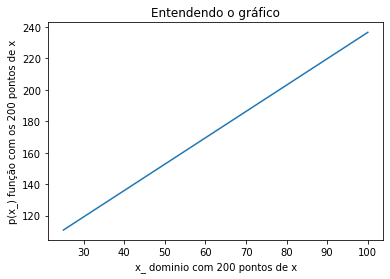

In [42]:
import matplotlib.pyplot as plt #importando a biblioteca Matplotib 

x_ = np.linspace(x.min(), x.max(), 200) #criadno um dominio linear (usandonp.linspace), 
 #x.min() é o valor minimo de x e x.max() é o valor maximo de x. se colocar um valor dentro vai forçar para aquele valor min ou max seja aquele 
 # do menor valor ao maior valor, construir 200 pontos. baseado no valor inciais de x 

plt.plot(x_ , p1(x_)) 
# x_ é dominio com 200 pontos
# p1() é a função criada 
# p1(x_) é a função com os 200 valores criados 

plt.title("Entendendo o gráfico")
plt.xlabel("x_ dominio com 200 pontos de x")
plt.ylabel("p(x_) função com os 200 pontos de x")
plt.show()

#   nesse gráfico foi avaliado do menor valor ao maior valor de x (eixo x)
#  com a função x_ foi criado 200 ponto, e colocado na função p1, ou seja p1(x_)
# 

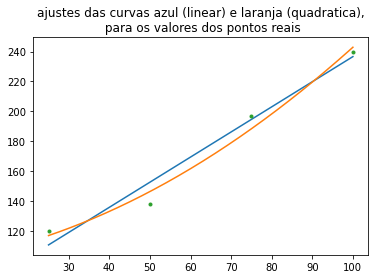

In [51]:
import matplotlib.pyplot as plt 

x_ = np.linspace(x.min(), x.max(), 200)   

# plt.plot(x, p1(x), x, p1_2(x))

plt.plot(x_, p1(x_)) #linha azul 
plt.plot(x_, p2(x_)) #linha laranja
plt.plot(x, y, '.') #pontos azul 
plt.title('ajustes das curvas azul (linear) e laranja (quadratica),\n para os valores dos pontos reais')
plt.show()

#\n no titulo para pular um linha 

Podemos perceber que as nossas linhas de regressão não passam diretamente nos pontos que temos, o que gera um **erro**. Existem diversas formas de calcularmos o erro da função que traçamos entre nossos pontos e uma delas é o **M**ean **S**quared **E**rror (Erro Quadrático Médio). Ele é dado pelo quadrado da diferença do y que temos pelo y previsto pela regressão.

\begin{equation}
\frac{1}{n}\sum_{i=1}^{n} (Y_i - YP_i)^{2}
\end{equation}

In [55]:
def mse(y_real, y_pred): #criando uma função para calcular 
  erros = (y_real - y_pred)**2   
  return erros.mean() #calcula a média da função criada 

In [63]:
mse(y, p1(x)) #erro quadrático médio 

# diferença entre y e p1(x)
# Ou seja, diferença entre entre y e a função linear 


79.67499999999994

In [59]:
print(type(y))  #verifica o tipo de cada objeto 
print(type(p1))

<class 'numpy.ndarray'>
<class 'numpy.poly1d'>


In [61]:
print(type(y))  #verifica o tipo de cada objeto 
print(type(p1(x))) # agora com x dentro de p1

#os dois ficam do mesmo jeito 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
mse(y,p2(x))

#aqui temos a diferença entre y e a função quadratica p2 usando os valores de x

40.61249999999992

observamos dessa forma o Erro p2 é menor, mais isso não indica quando foi ao melhor ajuste de curva ( regressão)

## Módulo 8: visualização de dados com Matplotlib

### Lição 1: Conhecendo o *Matplotlib*

O Matplotlib permite estilizarmos nossos gráficos como quisermos, colocando títulos e labels, escolhendo diferentes cores, escalas e tipos de linhas, além de podermos adicionar legendas que facilitam o entendimento das informações do gráfico.

Para usarmos a biblioteca precisamos, primeiro, importá-la

In [91]:
import matplotlib.pyplot as plt 
import numpy as np 

O **matplotlib.pyplot** é uma coleção de funções de estilo de comando que fazem matplotlib funcionar parecido com o MATLAB. Cada função de pyplot faz alguma alteração em uma figura: por exemplo, cria uma figura, cria uma área de plotagem em uma figura, plota algumas linhas em uma área de plotagem, decora a plotagem com rótulos, etc. \\

### Lição 2: Gráfico de curvas

No módulo anterior visualizamos, rápidamente, o gráfico do ajuste de curvas que fizemos. Nele, usamos o método **.plot()** do matplotlib. O comando plot gera um gráfico de curvas y versus x. 

No módulo anterior vimos:

In [66]:
x = np.array([25, 50, 75, 100]) # quantidade  de tecidos
y = np.array([120, 138, 197, 240]) # valores(preço) dos tecidos 
x_ = np.linspace(x.min(), x.max(), 200) # espaço linear do min valor de x até o mmaximo de 200
c1 = np.polyfit(x, y, 1) #ajuste das cursas de primeiro grau
c2 = np.polyfit(x, y, 2) # ajuste das cursas de segundo grau 
p1 = np.poly1d(c1) #polinommio do ajuste da curva 1
p2 = np.poly1d(c2) #polinomio do ajuste da curva 2

Se tivermos duas informações X e Y podemos demonstrá-las no grafico da seguinte forma: 

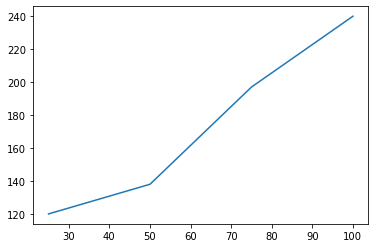

In [67]:
plt.plot(x,y)

Podemos perceber que é um gráfico bem normal e simplista. Vamos mudar algumas coisas para conseguirmos entender melhor o que está representado do gráfico.

Vamos ver como podemos melhorar o gráfico que fizemos no módulo anterior

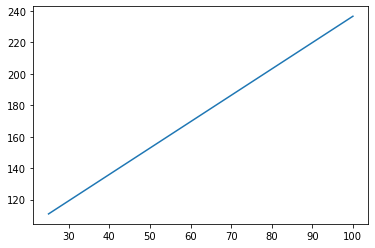

In [68]:
plt.plot(x_, p1(x_))

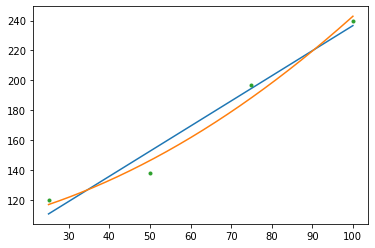

In [69]:
plt.plot(x_, p1(x_)) # linha azul
plt.plot(x_,p2(x_)) # linha vermelha
plt.plot(x,y,".") # o '.' significa que os valores vai ser representados por pontos e não uma reta

# obs: se tirar o '.', ficamos então com uma reta 

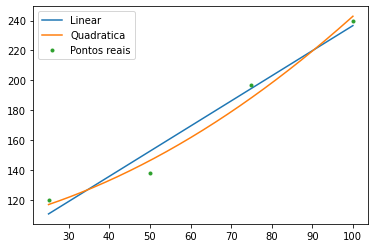

In [70]:
plt.plot(x_, p1(x_), label="Linear") # linha azul
plt.plot(x_,p2(x_), label = "Quadratica") # linha vermelha
plt.plot(x,y,".", label = "Pontos reais") # o '.' significa que os valores vai ser representados por pontos e não uma reta
plt.legend() # leganda vai para o lugar automatico 
# obs: se tirar o '.', ficamos então com uma reta 
#comandos: label informação que vai na legenda 
# e plt.legend para que mostre a legenda no gráfico 
# caso contrario a legenda ñ é a tribuida no gráfico 

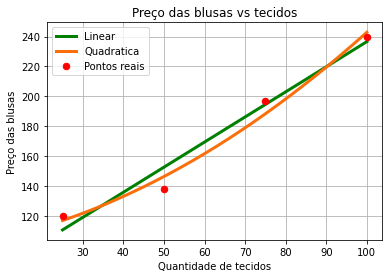

In [71]:
# adicionando mais informações ao gráfico 
plt.plot(x_, p1(x_), label="Linear", linewidth = 3,color = "g") 
plt.plot(x_,p2(x_), label = "Quadratica",linewidth = 3, color = "#FA6F0B") 
plt.plot(x,y,".", label = "Pontos reais", color = "r", markersize = 13) 
plt.legend() # leganda vai para o lugar automatico 
plt.ylabel("Preço das blusas")
plt.xlabel("Quantidade de tecidos")
plt.title("Preço das blusas vs tecidos")
plt.grid() #coloca linhas de grade 


# linewidth expesura da linha no gráfico 
# color cor da linha
# markersize é a cor do pontinho  
# plt.xlabel é legenda do eixo x
# plt.ylabel é legenda do eixo y
# plt.title é o titulo  

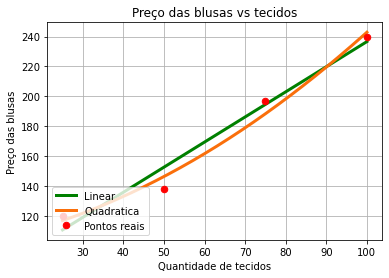

In [72]:
# adicionando mais informações ao gráfico 
plt.plot(x_, p1(x_), label="Linear", linewidth = 3,color = "g") 
plt.plot(x_,p2(x_), label = "Quadratica",linewidth = 3, color = "#FA6F0B") 
plt.plot(x,y,".", label = "Pontos reais", color = "r", markersize = 13) 

plt.ylabel("Preço das blusas")
plt.xlabel("Quantidade de tecidos")
plt.title("Preço das blusas vs tecidos")
plt.grid() #coloca linhas de grade 

plt.legend(loc="lower left") #a leganda vai pra baixo 
#poderia usar loc=0 ele escolher o melhor lugar 

# linewidth expesura da linha no gráfico 
# color cor da linha
# markersize é a cor do pontinho  
# plt.xlabel é legenda do eixo x
# plt.ylabel é legenda do eixo y
# plt.title é o titulo  

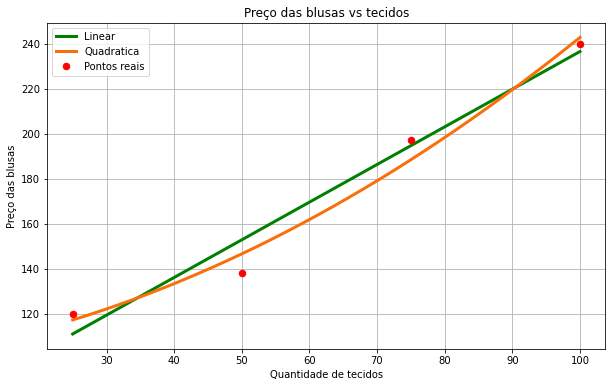

In [73]:
# adicionando mais informações ao gráfico 
plt.figure(figsize = (10,6)) #

plt.plot(x_, p1(x_), label="Linear", linewidth = 3,color = "g") 
plt.plot(x_,p2(x_), label = "Quadratica",linewidth = 3, color = "#FA6F0B") 
plt.plot(x,y,".", label = "Pontos reais", color = "r", markersize = 13) 

plt.ylabel("Preço das blusas")
plt.xlabel("Quantidade de tecidos")
plt.title("Preço das blusas vs tecidos")
plt.grid() #coloca linhas de grade 

plt.legend(loc="best") #a leganda vai pra baixo usando loc="lower left"
#poderia usar loc=0 ele escolher o melhor lugar 

plt.savefig("Meu_primeiro_Gráfico.png")

plt.show()

# plt.figure dimensão do gráfico, precisa está na primeira linha de codigo
# linewidth expesura da linha no gráfico 
# color cor da linha
# markersize é a cor do pontinho  
# plt.xlabel é legenda do eixo x
# plt.ylabel é legenda do eixo y
# plt.title é o titulo  
# plt.savefig para salvar a imagem do gráfico no diretorio 
# plt.show() força que motre todas as informções 


* As cores mais usadas do Matplotlib podem ser encontradas 
[neste link](https://matplotlib.org/3.1.0/gallery/color/named_colors.html). Se quisermos uma cor diferente, podemos pegar o código Hexadecimal da cor e passar como parâmetro

* Os marcadores possíveis podem ser vistos [aqui](https://matplotlib.org/api/markers_api.html)

* Podemos usar diversos sites para gerarmos os códigos *hexadecimais* qe desejamos, como o site da [adobe](https://color.adobe.com/pt/create/color-wheel)


### Lição 3: Gráfico de barras

O gráfico de barras é uma forma resumida de juntar e representar dados categóricos através de barras retangulares com pesos ou alturas proporcionais ao dados que representam. Em outras palavras, os gráficos de barras são bons se desejamos apresentar os dados de diferentes grupos que estão sendo comparados entre si.

Para vermos o funcionamento dos demais gráficos do módulo vamos usar uma base de dados bastante conhecida: **o conjunto de dados das flores Iris**. Esses dados contém 4 características (*features*) de 50 amostras de 3 espécies da flor Iris (Iris setosa, Iris virginica and Iris versicolor )

| Sepal length  | Sepal width | Petal length | Petal width | Variety |
|---------------|-------------|--------------|-------------|---------|
|               |             |              |             |         |

In [74]:
import csv

In [76]:
with open("iris.csv") as file:
    dados = csv.reader(file, delimiter = ',')
    dados = list(dados)
    
dados = np.array(dados) # lembrar de usar :import numpy as np
colunas = dados[0,:]
dados = dados[1:,:]

print(colunas)
print(dados)

['sepal.length' 'sepal.width' 'petal.length' 'petal.width' 'variety']
[['5.1' '3.5' '1.4' '.2' 'Setosa']
 ['4.9' '3' '1.4' '.2' 'Setosa']
 ['4.7' '3.2' '1.3' '.2' 'Setosa']
 ['4.6' '3.1' '1.5' '.2' 'Setosa']
 ['5' '3.6' '1.4' '.2' 'Setosa']
 ['5.4' '3.9' '1.7' '.4' 'Setosa']
 ['4.6' '3.4' '1.4' '.3' 'Setosa']
 ['5' '3.4' '1.5' '.2' 'Setosa']
 ['4.4' '2.9' '1.4' '.2' 'Setosa']
 ['4.9' '3.1' '1.5' '.1' 'Setosa']
 ['5.4' '3.7' '1.5' '.2' 'Setosa']
 ['4.8' '3.4' '1.6' '.2' 'Setosa']
 ['4.8' '3' '1.4' '.1' 'Setosa']
 ['4.3' '3' '1.1' '.1' 'Setosa']
 ['5.8' '4' '1.2' '.2' 'Setosa']
 ['5.7' '4.4' '1.5' '.4' 'Setosa']
 ['5.4' '3.9' '1.3' '.4' 'Setosa']
 ['5.1' '3.5' '1.4' '.3' 'Setosa']
 ['5.7' '3.8' '1.7' '.3' 'Setosa']
 ['5.1' '3.8' '1.5' '.3' 'Setosa']
 ['5.4' '3.4' '1.7' '.2' 'Setosa']
 ['5.1' '3.7' '1.5' '.4' 'Setosa']
 ['4.6' '3.6' '1' '.2' 'Setosa']
 ['5.1' '3.3' '1.7' '.5' 'Setosa']
 ['4.8' '3.4' '1.9' '.2' 'Setosa']
 ['5' '3' '1.6' '.2' 'Setosa']
 ['5' '3.4' '1.6' '.4' 'Setosa']
 ['5.

In [77]:
# separando as colunas individualmente e transformando para os tipos de colunas corretos 
sepal_legth = dados[:,0].astype(float) #informações da primeira coluna 
sepal_wistd = dados[:,1].astype(float)
Petal_length = dados[:,2].astype(float)
Petal_width = dados[:,3].astype(float)
tipo = dados[:,4] #ñ precisa transformar por os elmentos são caractere mesmo 


In [78]:
import collections

qtd = collections.Counter(tipo) 
qtd


Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})

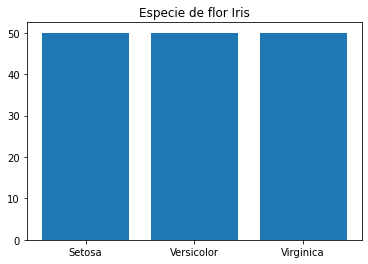

In [79]:
plt.bar(qtd.keys(), qtd.values())
plt.ylabel =("Quantidade de uma especie")
plt.xlabel =("Especie")
plt.title ("Especie de flor Iris")
plt.show()


Apesar de termos um gráfico visualmente bom, podemos melhorá-lo igual fizemos com o gráfico plot. Vejamos como.

<BarContainer object of 3 artists>

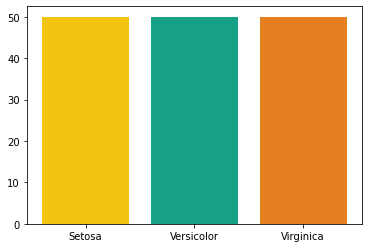

In [80]:
colors = ['#f1c40f', '#16a085', '#e67e22','#3498db']
plt.bar(qtd.keys(), qtd.values(), color= colors)


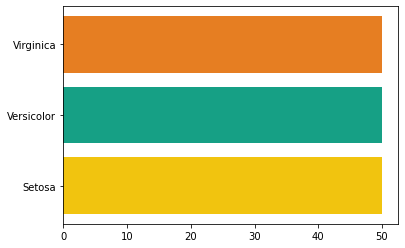

In [81]:
# invertendo as barras para vertical 

colors = ['#f1c40f', '#16a085', '#e67e22','#3498db']
plt.barh(list(qtd.keys()), qtd.values(), color= colors)
plt.xlabel=("Quantidade de uma especie")
plt.ylabel=("Especie")
plt.title=("Especie de flor Iris")
plt.show()

### Lição 4: Histograma

O histograma, também conhecido como "Diagrama de disperção de frequências, é uma das ferramentas que compõem a qualidade. 

Ele é basicamente uma representação gráfica, em colunas (retângulos), de um conjunto de dados previamente tabulados e divididos em classes uniformes. 


O histograma fornece um caminho para avaliar a distribuição dos dados e permite verificar o comportamento de um processo em relação a sua especificação

Leia mais sobre histogramas em [nosso blog](https://www.voitto.com.br/blog/artigo/o-que-e-um-histograma)

![](https://lh4.googleusercontent.com/NzekatDWsWVZ2zaOppWJmNIoo0P_qr5SGht24ijutDYU6EZiNoOdIa2HenrAG-y0Sj853XTAciNWP9j3TisqmwufjVWCOid6_f3LQ3ONi_WqxM25eGRMxmBxcK9OEWX2Eg70rj0e)

Para entendermos como podemos usar essa ferramenta no Python vamos ter uma ajuda do Numpy. No módulo 5 mostramos como podemos criar um array aleatório com o  método *random()*. 

Com o random podemos criar arrays que seguem uma distribuição normal:

In [82]:
normal = np.random.normal(size=100)
normal



array([-0.09258991, -0.28098485,  1.15076739, -1.2674455 , -0.06756363,
        0.44484352,  0.99272728, -0.09775054, -0.54162378,  0.65578603,
        0.02340262, -0.22321864,  0.1619209 , -0.28178111, -0.49210796,
       -1.79910113, -1.52937499,  1.68623143,  0.42306542, -0.63904392,
       -0.47716256, -1.96010001, -0.62961363,  1.0390032 ,  0.25048741,
        1.9489787 ,  1.01509577, -0.63024155,  0.81063939,  0.36412454,
       -0.92893582, -1.04561069,  0.03810157, -0.01714145,  0.96512253,
       -0.80108673,  0.66780305,  1.26933601,  0.26371358, -0.62243486,
        1.14967157,  0.27342539, -0.19506761, -0.63455664, -1.52147917,
        0.33158971,  0.95047326,  1.24898988,  1.12263215, -0.20961298,
       -1.75417425,  0.87635878,  0.19646494, -3.15018437, -0.27710725,
       -0.67022232,  1.60111988, -0.99600797,  1.59995009,  0.3154759 ,
       -0.49229541, -1.7965827 ,  0.69767745,  0.28865261, -0.10570371,
        1.98595025,  0.46262687,  0.01234235,  0.01313278,  0.39

In [83]:
normal2 = np.random.normal(size=100)

Para plotar o histograma usamos o método *.hist()*

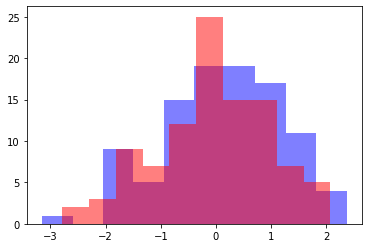

In [84]:
plt.hist(normal, color = "b", alpha=0.5)
plt.hist(normal2, color= "r",alpha=0.5)
plt.show()

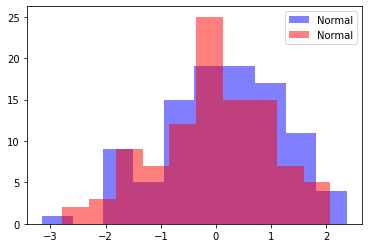

In [85]:
plt.hist(normal, color = "b", alpha=0.5, label = 'Normal')
plt.hist(normal2, color= "r",alpha=0.5, label = 'Normal')
plt.legend()
plt.show()

TypeError: 'str' object is not callable

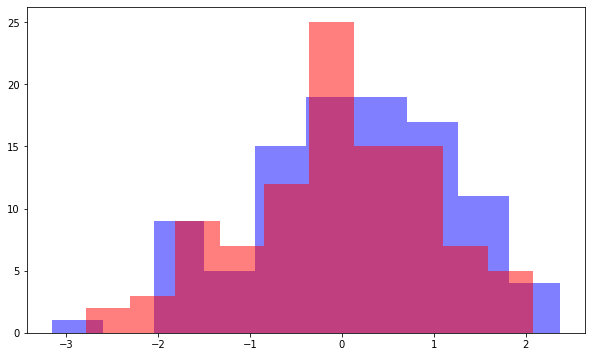

In [95]:
plt.figure(figsize = (10,6))

plt.hist(normal, color = "b", alpha=0.5, label = 'Normal')
plt.hist(normal2, color= "r",alpha=0.5, label = 'Normal')
plt.xlabel("Números", fontsize = 16)
plt.ylabel("Frequência",fontsize = 16)  #fontsize tamanho da fonte da letra
plt.title("histograma",fontsize = 20)
plt.legend(fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

O método hist possui parâmetros interessantes para montarmos nosso gráfico. Aqui, vamos abordar apenas os que achamos interessantes, para saber mais acesse a [documentação oficial](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

**Bins**: esse parâmetro define o tamanho de cada "caixa" do nosso histograma. Ele definirá o número de caixas de largura igual no intervalo, ou sequências.

**Density**: esse parâmetro recebe como valor uma variável booleana (True ou False). Se verdadeira retornará uma densidade de probabilidade, ou seja, cada caixa exibirá a contagem bruta caixa dividida pelo número total de contagens

TypeError: 'str' object is not callable

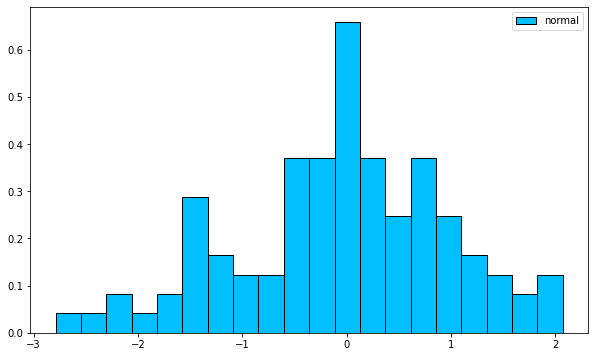

In [94]:
plt.figure(figsize=(10,6))
n, caixas, trechos = plt.hist(normal2, label ="normal", ec="black", 
                              bins=20, color = 'deepskyblue', density = True)
plt.legend()
plt.title("Histograma")
plt.title("Histograma")
plt.xlabel('números')
plt.ylabel('Frequência')

trechos[5].set_fc("gold") # patches 
trechos[6].set_hatch("//")

plt.show()

Para saber mais sobre os Patches, veja a [documentação oficial](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Patch.html)

Uma parte interessante dos histogramas é que eles costumam seguir o padrão de uma normal. Para vermos como plotar a normal juntmente com o histograma vamos usar o módulo **stats** da biblioteca *Scipy*

In [96]:
from scipy import stats

TypeError: 'str' object is not callable

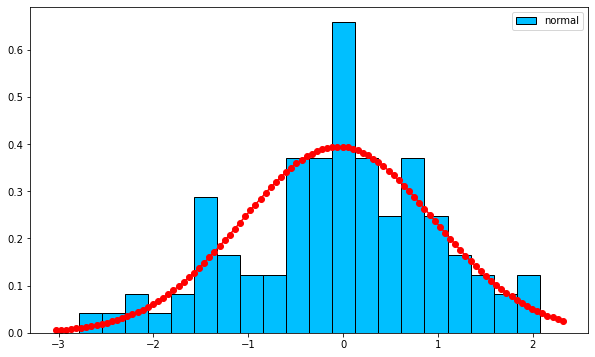

In [100]:
plt.figure(figsize=(10,6))
n, caixas, trechos = plt.hist(normal2, label ="normal", ec="black", 
                              bins=20, color = 'deepskyblue', density = True)

#fazendo a curva da distribuição 
xmin, xmax =plt.xlim()
x = np.linspace(xmin,xmax,100)
norm = stats.norm.pdf(x, np.mean(normal2),np.std(normal2))     # distribuição normal com dois parametros, media e desvio padrão

plt.plot(x,norm,"-or")

plt.legend()
plt.title("Histograma")
plt.xlabel('números')
plt.ylabel('Frequência')
plt.show()

### Lição 5: Gráfico de pizza

O gráfico de setores, ou gráfico circular, é comumente chamado de gráfico de pizza. 
Ele é um gráfico estatístico circular que pode exibir apenas uma série de dados, em que a área total do gráfico equivale a 100% dos dados fornecidos e a área dos pedaços representa a porcentagem de cada um em relação ao todo.

Esse tipo de gráfico é muito utilizado  ​​em apresentações de negócios, como vendas, operações, resultados de pesquisas, recursos, etc., pois fornecem um resumo rápido.

Através do método *plt.pie()* precisamos passamos como parâmetro um array *x* com os valores de cada fatia. Vamos criar uma gráfico para representar a participação que cada uma das espécies da flor iris aprensentam na nossa base total

In [101]:
qtd

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})

In [102]:
quantidade = qtd.values()
quantidade = list(quantidade)

chaves = qtd.keys()
chaves = list(chaves)

print(quantidade)
print(chaves)

[50, 50, 50]
['Setosa', 'Versicolor', 'Virginica']


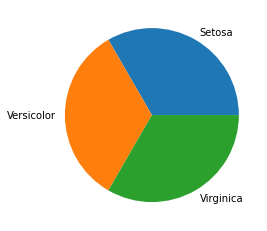

In [103]:
plt.pie(quantidade, labels = chaves) #gráfico de pizza
plt.show()

Assim como melhoramos os gráficos passados, podemos, também, melhorar nosso gráfico de pizza

Na célula abaixo, criamos um código para identificar qual a primeira maior ocorrência da quantidade de espécies para destacá-la em nosso gráfico.

In [104]:
index_max = quantidade.index(max(quantidade))

explode = [0]*len(quantidade)
print(explode)

explode[index_max] = 0.1
print(explode)

[0, 0, 0]
[0.1, 0, 0]


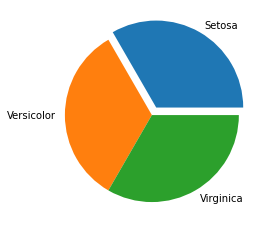

In [105]:
# vai dividir a variavel setosa no gráfico 
plt.pie(quantidade, labels = chaves, explode = explode)
plt.show()

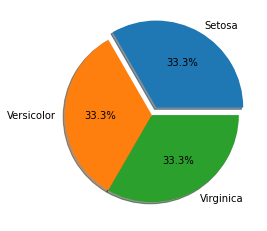

In [106]:
#acrescentando alguns comandos 
plt.pie(quantidade, labels = chaves, explode = explode, 
        autopct = '%1.1f%%', shadow = True)
plt.show()

#autopct:
#coloca os valores refe. a cada pedaço da pizza .1f informa uma casa decimal
# o primeiro (1).1f o q ta em parentes refere- se ao deslocamento na imagem 

# shadow = true
#coloca sombra no gráfico 

### Lição 6: Gráfico de dispersão

O gráfico de dispersão, o diagrama de dispersão, é uma ferramenta muito útil para encontrar correlações entre os dados que temos. Nesse tipo de gráfico cada ponto dos nossos dados é representado por um ponto. 

Existem 3 tipos de correlação que podem ser identificadas com o gráfico de dispersão:

1. Correlação positiva
2. Correlação negativa
3. Sem correlação

![Tipos de correlação](https://drive.google.com/uc?export=view&id=1dK9ynKSwmvqer3A6ASLt_QzlFysYcdAT) 



Para ver mais detalhes sobre gráficos de dispersão leia [em nosso blog](https://www.voitto.com.br/blog/artigo/diagrama-de-dispersao)

Vamos ver se conseguimos achar alguma correlação entre as features que temos. Por exemplo, será que a 
largura sépala possui correlação com a largura da pétala? Se houver, essa correlação é positiva ou negativa?

O método que usaremos para plotar o gráfico de dispersão é o *plt.scatter*.

In [107]:
print(colunas)
print(dados)

['sepal.length' 'sepal.width' 'petal.length' 'petal.width' 'variety']
[['5.1' '3.5' '1.4' '.2' 'Setosa']
 ['4.9' '3' '1.4' '.2' 'Setosa']
 ['4.7' '3.2' '1.3' '.2' 'Setosa']
 ['4.6' '3.1' '1.5' '.2' 'Setosa']
 ['5' '3.6' '1.4' '.2' 'Setosa']
 ['5.4' '3.9' '1.7' '.4' 'Setosa']
 ['4.6' '3.4' '1.4' '.3' 'Setosa']
 ['5' '3.4' '1.5' '.2' 'Setosa']
 ['4.4' '2.9' '1.4' '.2' 'Setosa']
 ['4.9' '3.1' '1.5' '.1' 'Setosa']
 ['5.4' '3.7' '1.5' '.2' 'Setosa']
 ['4.8' '3.4' '1.6' '.2' 'Setosa']
 ['4.8' '3' '1.4' '.1' 'Setosa']
 ['4.3' '3' '1.1' '.1' 'Setosa']
 ['5.8' '4' '1.2' '.2' 'Setosa']
 ['5.7' '4.4' '1.5' '.4' 'Setosa']
 ['5.4' '3.9' '1.3' '.4' 'Setosa']
 ['5.1' '3.5' '1.4' '.3' 'Setosa']
 ['5.7' '3.8' '1.7' '.3' 'Setosa']
 ['5.1' '3.8' '1.5' '.3' 'Setosa']
 ['5.4' '3.4' '1.7' '.2' 'Setosa']
 ['5.1' '3.7' '1.5' '.4' 'Setosa']
 ['4.6' '3.6' '1' '.2' 'Setosa']
 ['5.1' '3.3' '1.7' '.5' 'Setosa']
 ['4.8' '3.4' '1.9' '.2' 'Setosa']
 ['5' '3' '1.6' '.2' 'Setosa']
 ['5' '3.4' '1.6' '.4' 'Setosa']
 ['5.

In [108]:
l_sepela = dados[:, 0].astype(float)
l_petala = dados[:, 2].astype(float)

print(l_petala)
print(l_sepela)

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6

TypeError: 'str' object is not callable

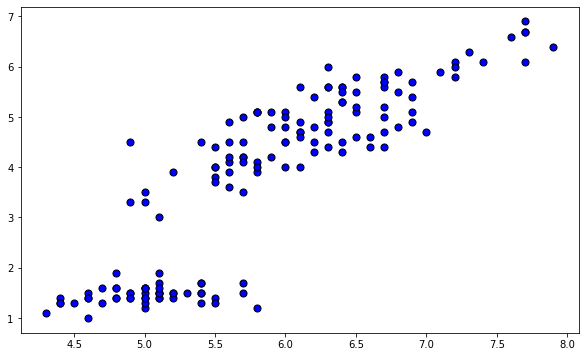

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(l_sepela, l_petala,c="b", s = 50, edgecolor = 'k')
plt.xlabel ("comprimento da sepala")
plt.ylabel("comprimento da petala")
plt.title("correlação entre comprimento da sepala e comprimento da petala")
plt.show()

# s = 20 é o tamanho do ponto 

Veja que o nosso gráfico parece com o gráfico de correlação positiva entre o comprimento da pétala e o comprimento da sépala. Vamos usar nossa ideia de regressão para vermos qual linha se adapta melhor aos dados

In [110]:
regressao1 = np.polyfit(l_sepela, l_petala, 1)
regressao2 = np.polyfit(l_sepela, l_petala, 2)
regressao3 = np.polyfit(l_sepela, l_petala, 3)


In [111]:
equacao1 = np.poly1d(regressao1)
equacao2 = np.poly1d(regressao2)
equacao3 = np.poly1d(regressao3)

print(equacao1)      #vai retornar todas as equações de 1,2 e 3graus 
print(equacao2)
print(equacao3)

 
1.858 x - 7.101
         2
-0.2959 x + 5.392 x - 17.45
         3         2
-0.1742 x + 2.877 x - 13.58 x + 19.8


TypeError: 'str' object is not callable

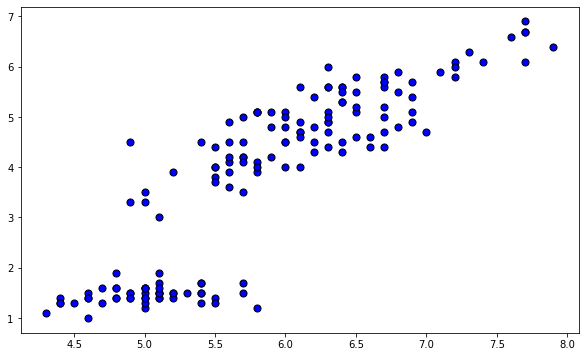

In [112]:
x = np.linspace(l_sepela.min(), l_sepela.max(), 150)

plt.figure(figsize=(10,6))
plt.scatter(l_sepela, l_petala,c="b", s = 50, edgecolor = 'k')
plt.xlabel ("comprimento da sepala")
plt.ylabel("comprimento da petala")
plt.title("correlação entre comprimento da sepala e comprimento da petala")

plt.plot(x, equacao1(x), c = 'r', lw = 3, label = ' ajuste linear ')
plt.plot(x, equacao2(x), c = 'g', lw = 3, label = ' ajuste quadratico ')
plt.plot(x, equacao3(x), c = 'black', lw = 3, label = ' ajuste plinomial ')

plt.legend()


plt.show()

# s = 20 é o tamanho do ponto 